In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [3]:
file = pd.read_excel("dataset.xlsx")

In [4]:
file.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [5]:
df = file.copy()

Nous avons 5644 observations et 111 variables explicatives dans notre dataset

In [6]:
df.shape

(5644, 111)

Nous avons 74 variables quantitatives et 37 variables qualitatives

In [7]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

# Analyse des valeurs manquantes

-Nous avons decider de visualiser notre dataset en entier avec la fonction heatmap

-Après avoir mesurer le pourcentage de valeurs manquantes nous avons decider (puisqu'on a beaucoup de variables manquantes) d'eliminer toutes les variables dont le pourcentage de données manquantes est superieur à 90% ce sont des colonnes inutiles.

-Après cette operation on est passé de 111 colonnes à 39 colonnes.

-Nous avons decidé aussi d'eliminer la colonne "Patient ID" car cette colonne est inutile elle ne contient que l'ID des patients ce qui nous importe peu voire pas du tout. 


In [8]:
missing_mask = df.isnull()
total_missing = missing_mask.sum().sum()
total_cells = np.product(df.shape)
global_missing_percentage = (total_missing / total_cells) * 100
print(global_missing_percentage)

88.06003026414082


In [9]:
df.isna()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0           True       True                   True             True   
1          False      False                  False            False   
2           True       True                   True             True   
3           True       True                   True             True   
4           True       True                   True             True   
...          ...        ...                    ...              ...   
5639        True       True                   True             True   
5640        True       True                   True             True   
5641        True       True                   True             True   
5642        True       True                   True             True   
5643       False      False                  False            False   

      Lymphocytes  Mean corpu

In [10]:
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

<AxesSubplot:>

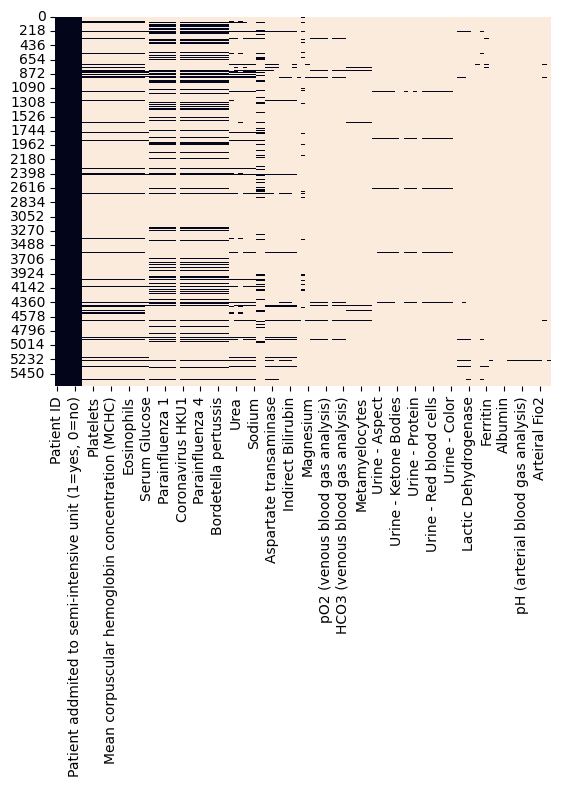

In [11]:
sns.heatmap(df.isna(),cbar=False)

In [12]:
df.isna().sum() / df.shape[0]


Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [13]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

In [14]:
df.isna().sum()/df.shape[0]

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

<AxesSubplot:>

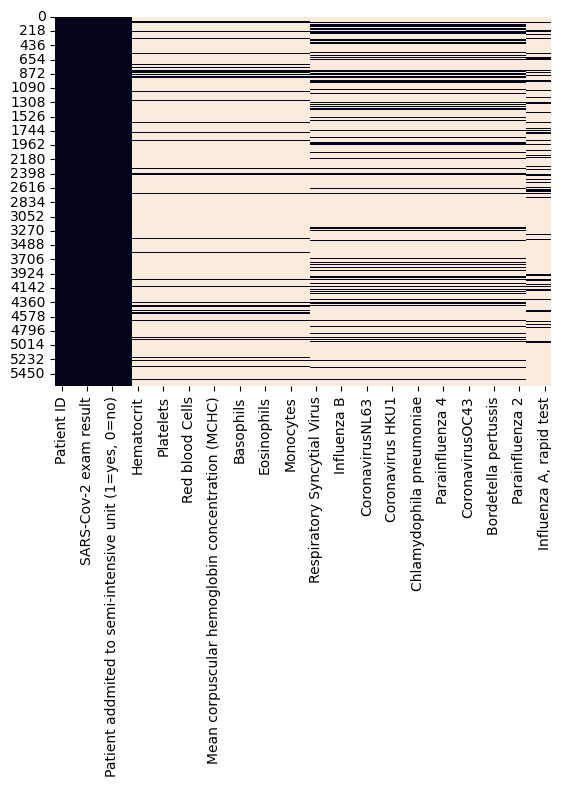

In [15]:
sns.heatmap(df.isna(),cbar=False)

In [16]:
df=df.drop('Patient ID',axis=1)

In [17]:
df


Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
0             NaN                                               NaN   
1        0.318366                          

# Visualisation de la colonne target

-Nous observons que notre dataset contient 5086 cas negatifs et 558 cas positifs

-Nous pouvons affirmer que nos classes ne sont pas equilibrées

-Alors il faudra utiliser des metriques comme le "Score F1", "la sensibilité" ou "la precision"

In [18]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

# histogrames des variables continues

-Nous avons fait cette partie pour voir la distribution de nos differentes variables

-La première chose que nous voyons c'est que toutes nos courbes sont centrées en zeros et un ecart-type egale à 1 ce qui nous laisse comprendre que ces données ont été standardisées.

-Nous pouvons aussi voir que pas mal de ces variables suivent une distribution normale mais pas toute comme la variable "Eosinophils"

/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

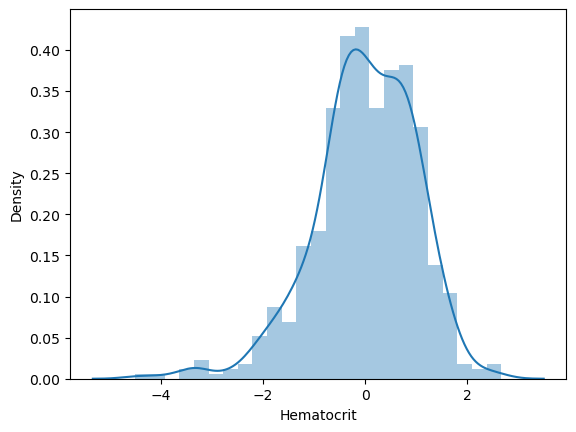

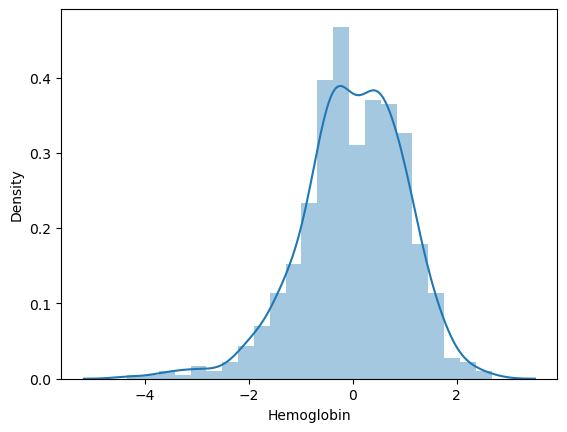

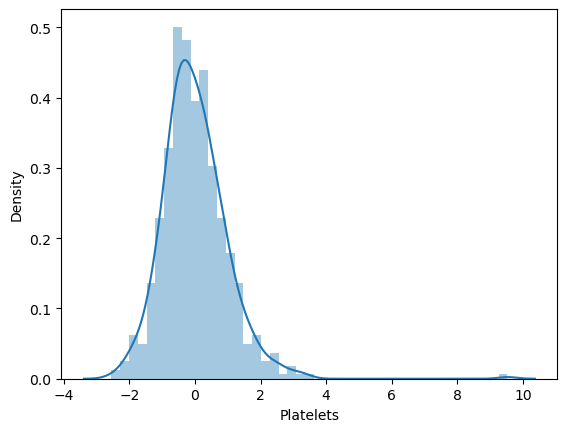

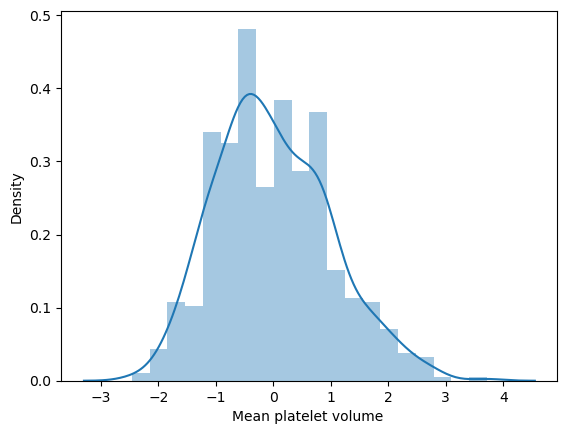

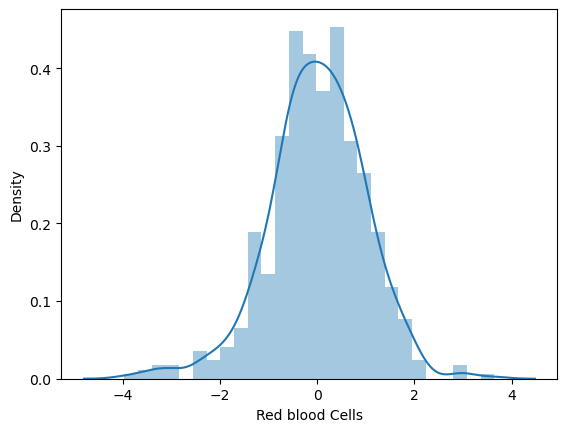

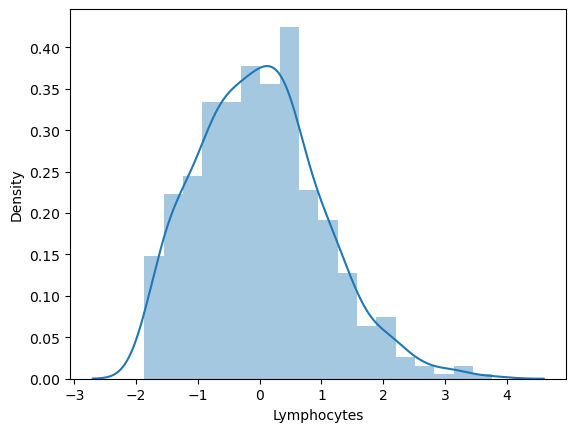

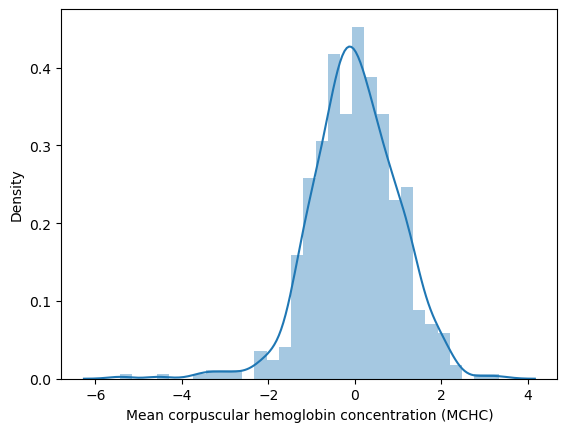

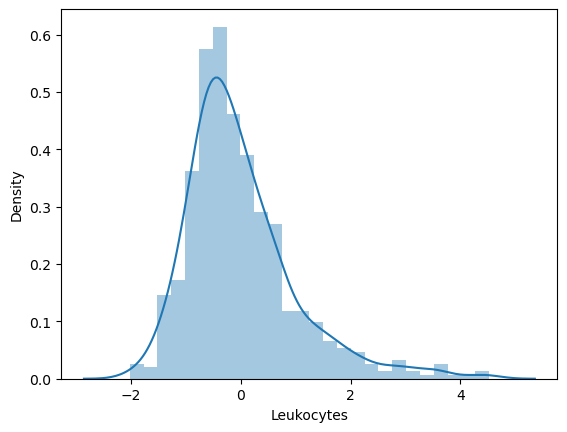

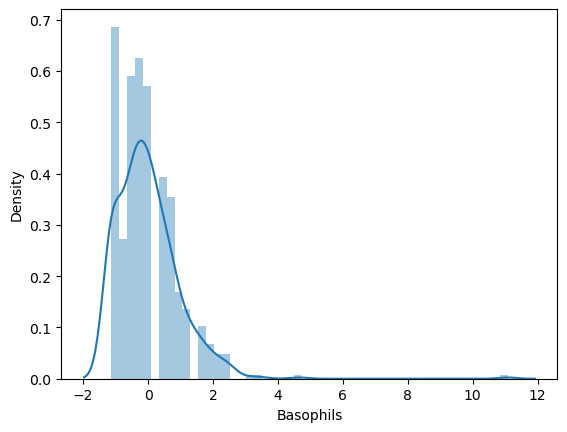

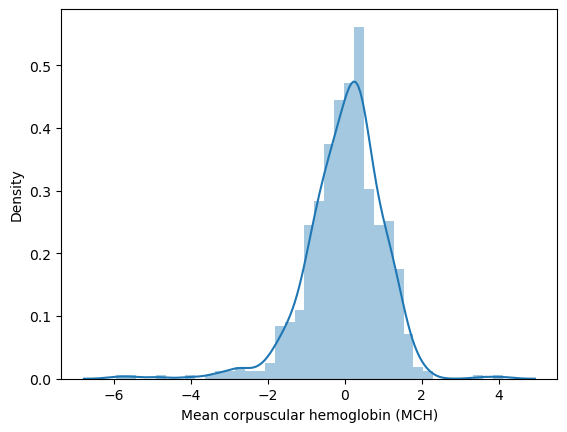

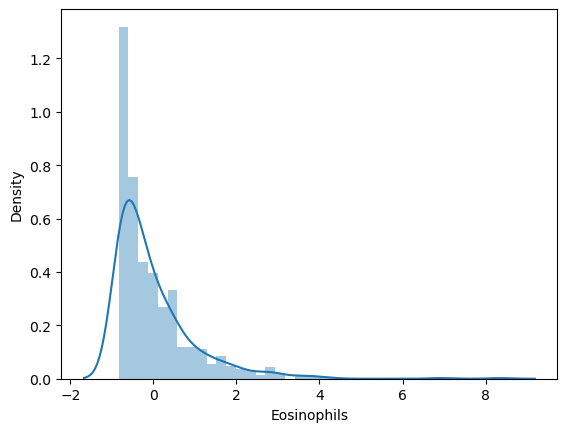

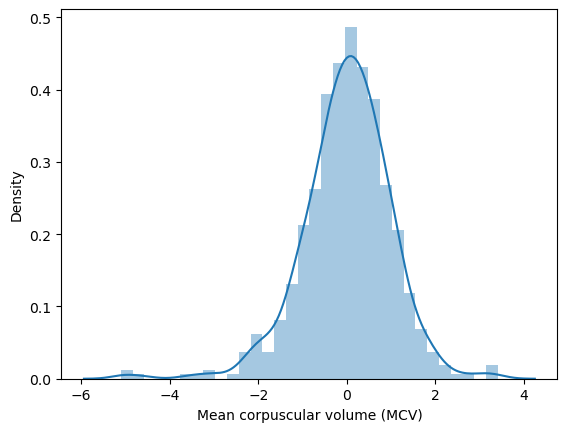

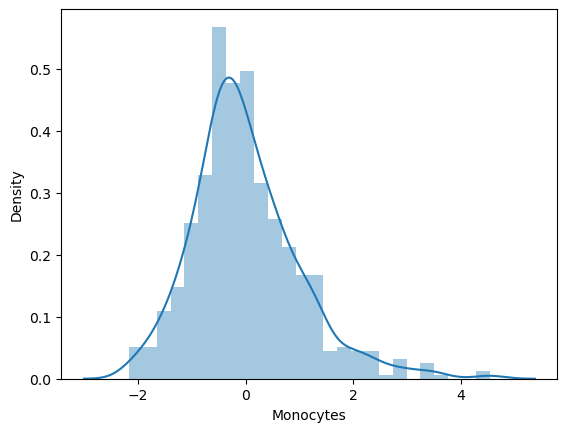

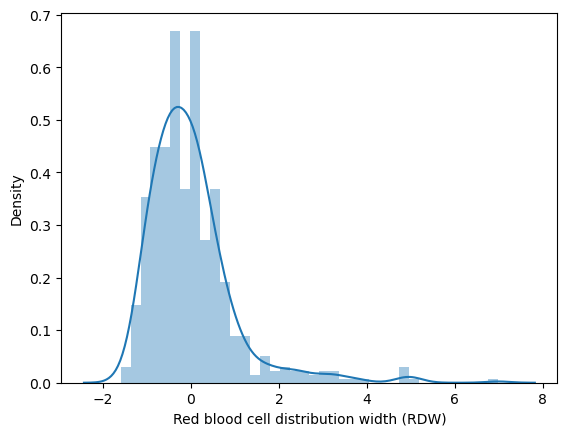

In [19]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

# Visualisation des variables qualitatives

-Nous voyons que nos variables qualitatives sont tous binaires soit positif ou negatif ou soit detected ou non detected

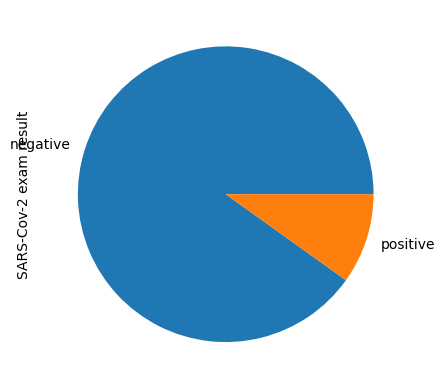

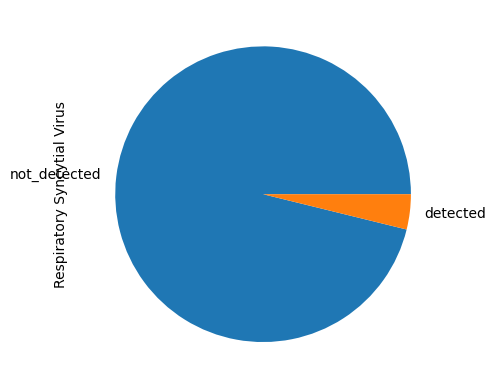

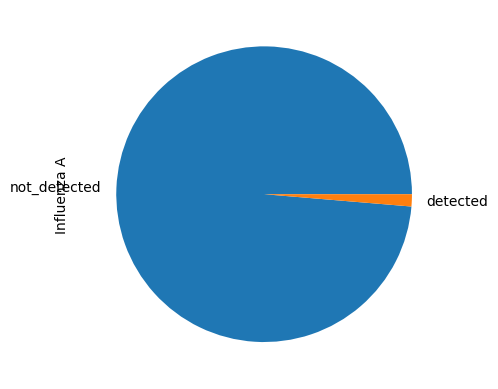

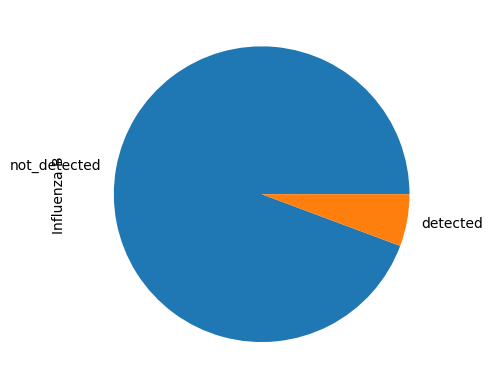

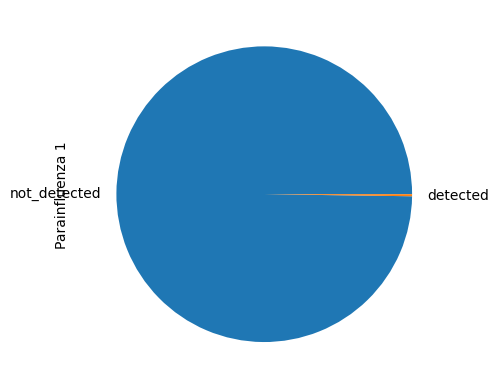

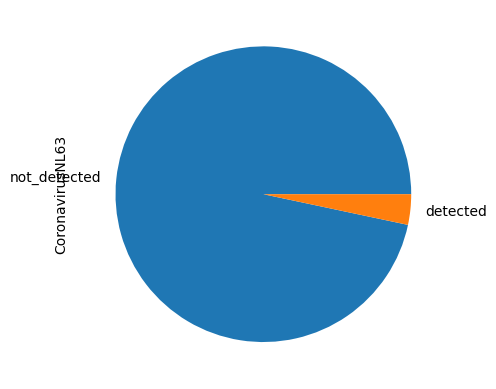

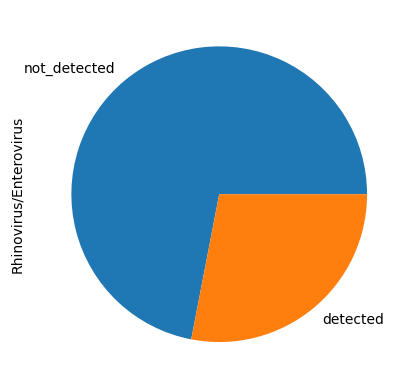

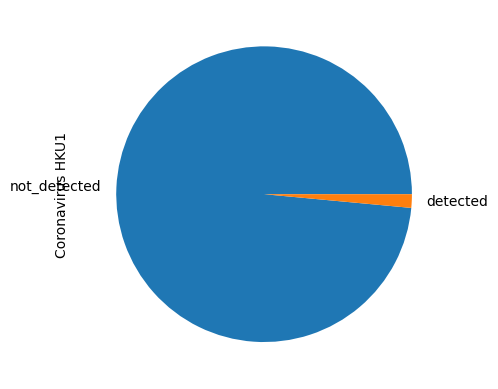

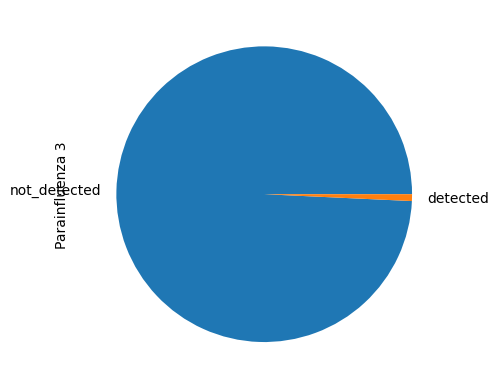

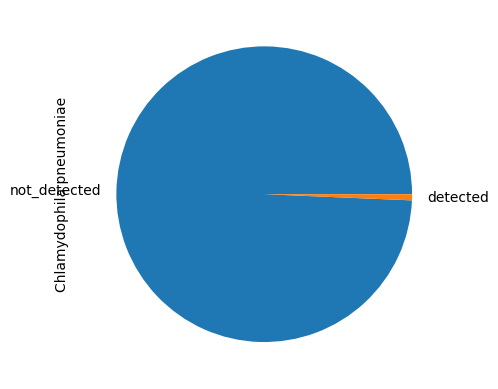

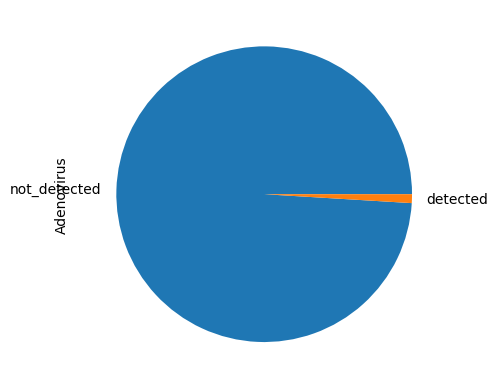

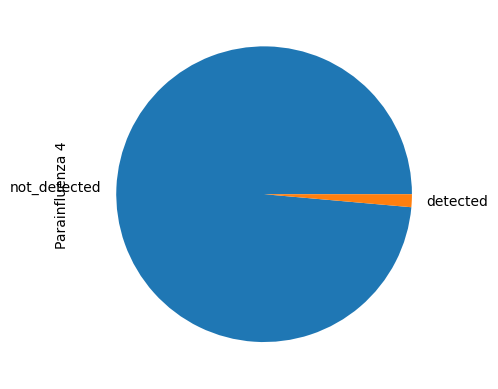

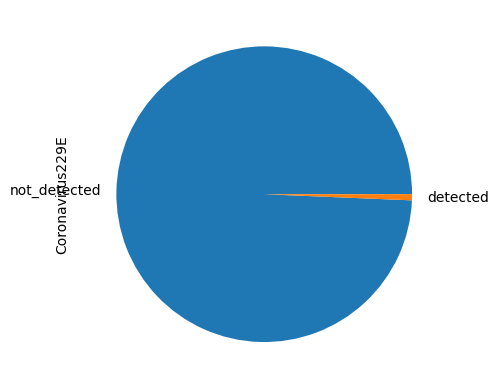

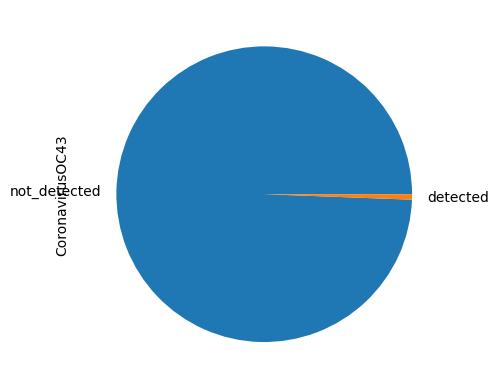

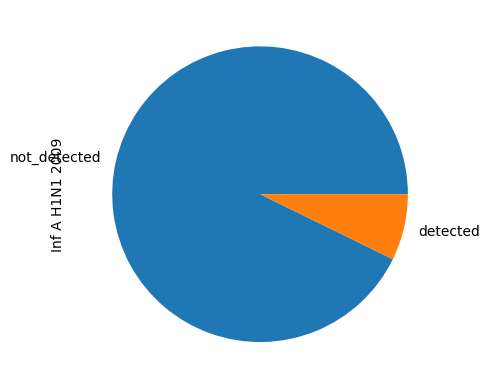

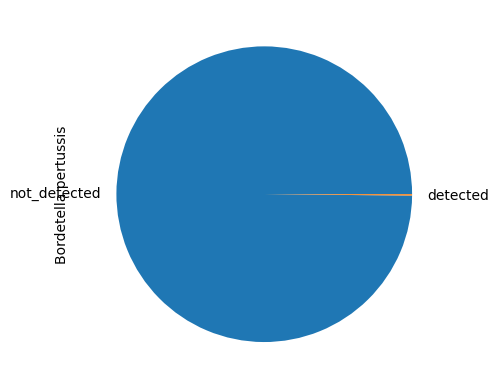

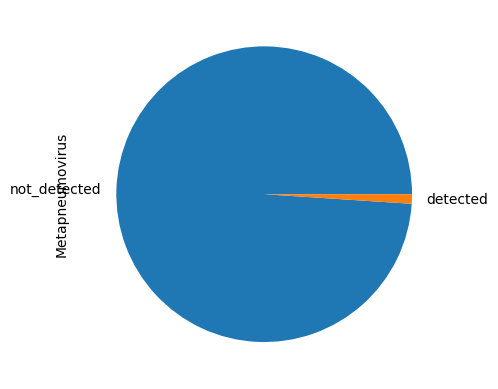

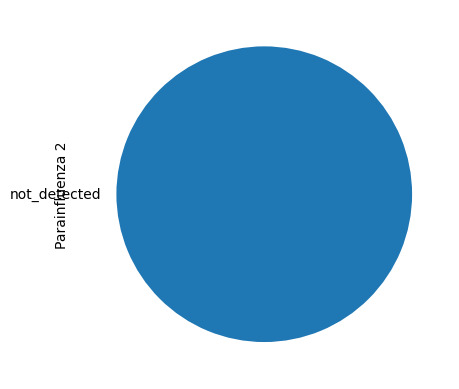

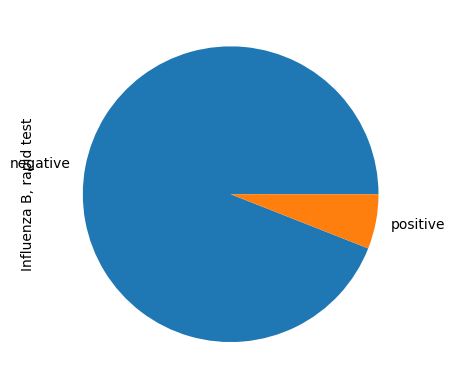

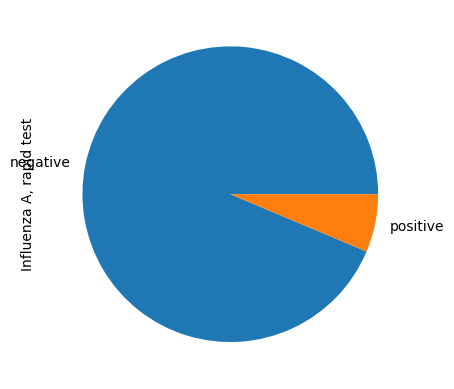

In [20]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

# Relation target/variable

-En consultant le docteur nous avons vu que nous pouvons regrouper nos données en deux types: "Test viral" et "Taux sanguins.

## Objectif : 
c'est de voir variable après variable s'il y a une difference entre les cas positifs et negatifs à travers ça nous pouvons conclure qu'elle variable est significative ou pas.

## Conclusion

-Pour l'hematocrit et l'hemoglobine on ne voit rien de speciale

-Sur les platelets nous constatons que les personnes atteintes du covid-19 ont des taux de platelets differents de celles qui sont negatives alors la conclusion que nous pouvons tirer c'est que les platelets sont significatives.

-Sur les leukocytes on a aussi une difference -> variable significative

-Sur les Mean platelet volume , red blood cell, Lymphocytes on ne voit pas difference majeur

-Sur les Basophils on observe une difference -> variable significative

-Sur les Eosinophils on observe une difference -> variable significative

-Sur les Monocytes on observe une difference -> variable significative

Pour etre plus rigoureux nous allons faire un test de significativité pour confirmer nos dits.

## Creation de sous echantillon positf et negatif

In [21]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [22]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

Creation des sous ensembles blood et viral

In [23]:
missing_rate = df.isna().sum()/df.shape[0]


In [24]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate >0.88)]

In [25]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

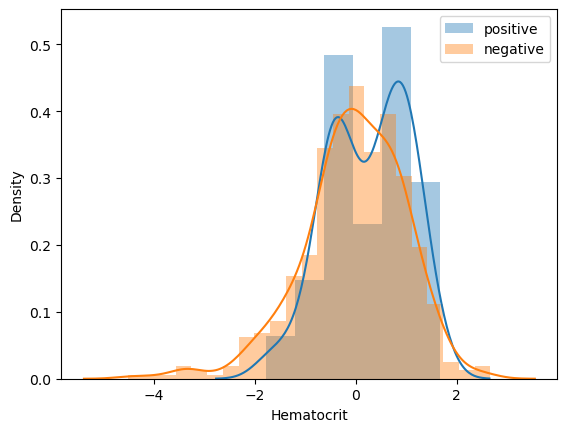

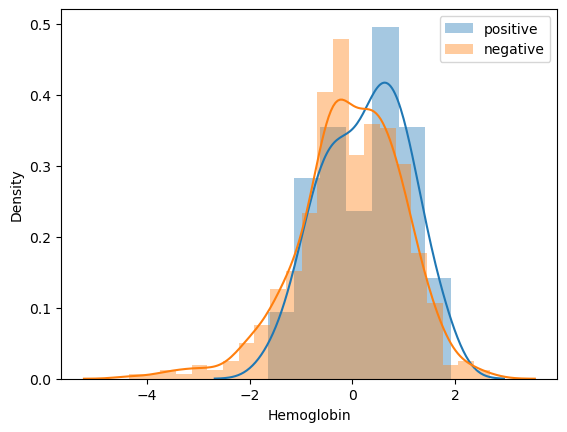

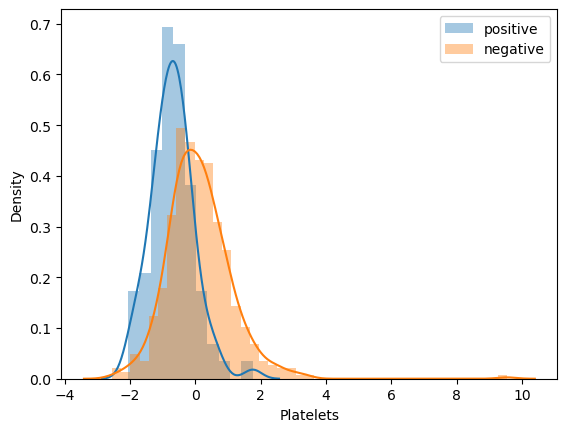

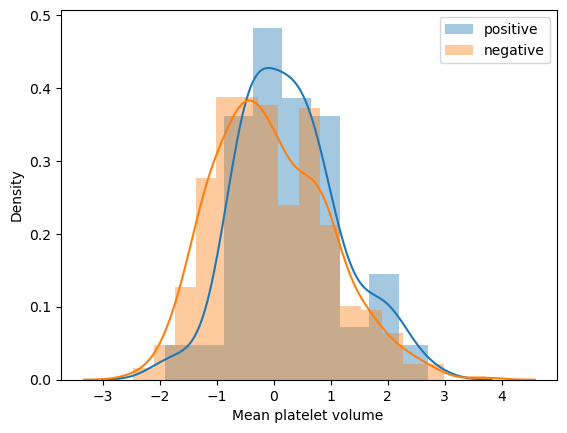

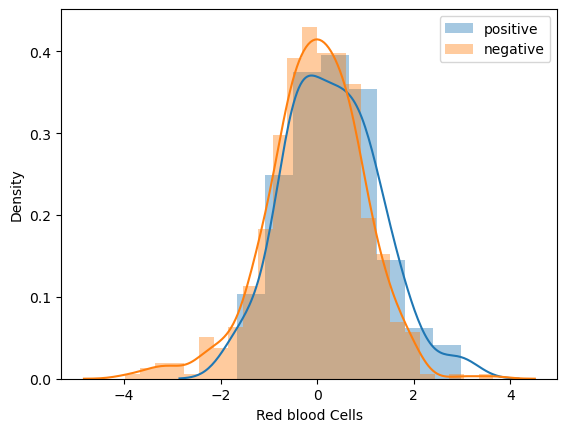

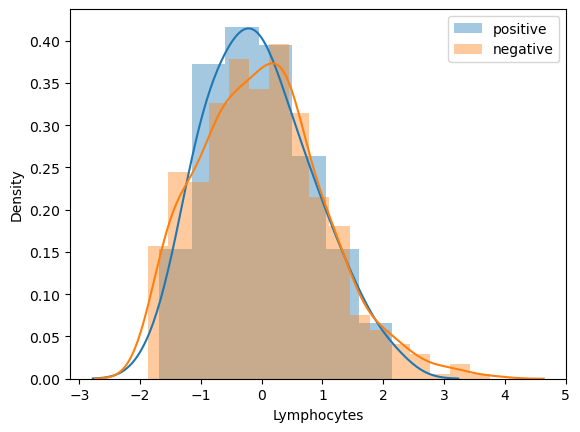

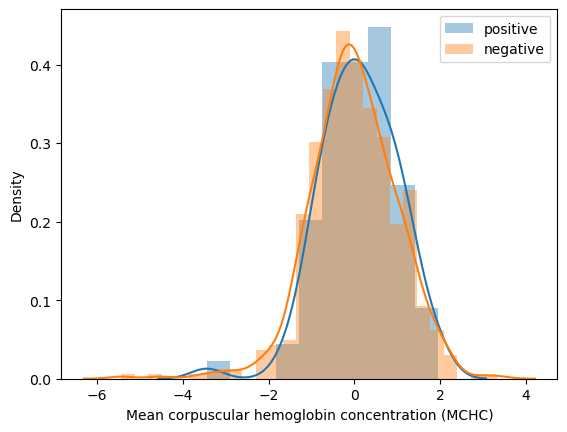

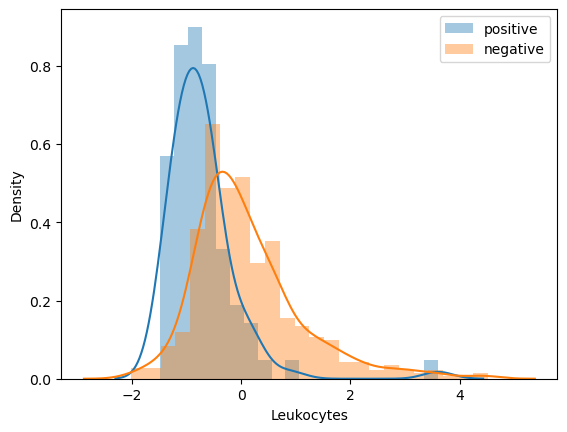

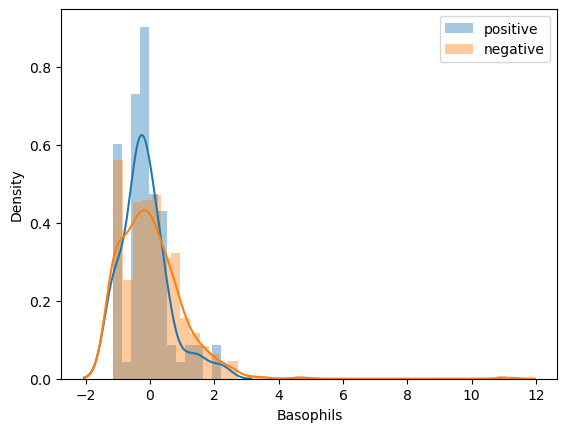

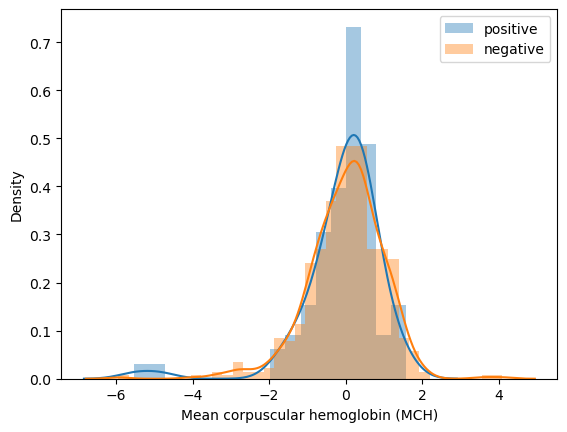

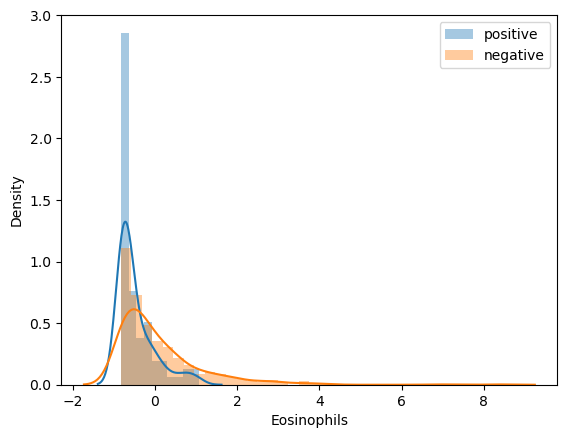

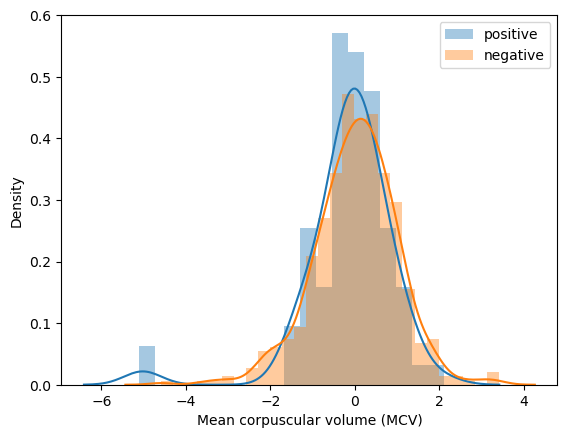

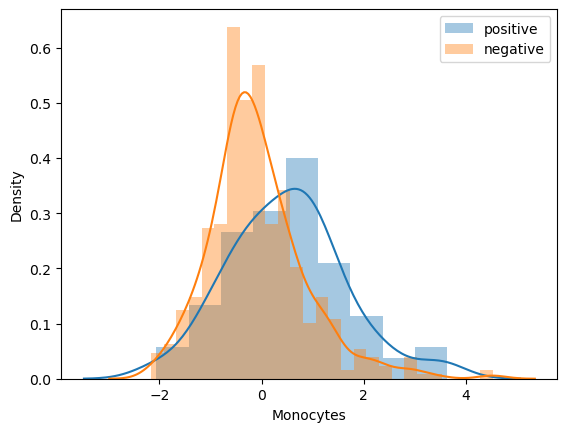

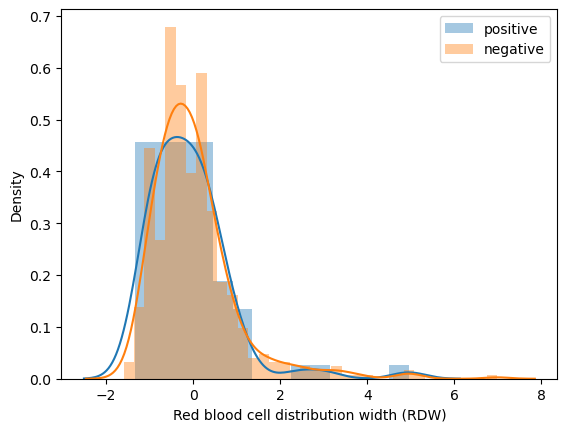

In [26]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

# Relation variable / variable

## Relations taux sanguins

En analysant la matrice de correlation on collecte beaucoup d'information qui vont nous aider à prendre des decisions.

-Nous observons que nos variables Hematocrit et hemoglobines sont très correlées donc nous pouvons prendre la decision d'eliminer un des deux.
Mais pour etre sur d'eliminer le bon nous allons une fois de suite consulter le docteur pour qu'il nous donne son avis d'expert la dessus.


-les variables "Mean corpuscular volume et Mean  corpuscular hemoglobin" sont correlées aussi donc on va appliquer le meme principe

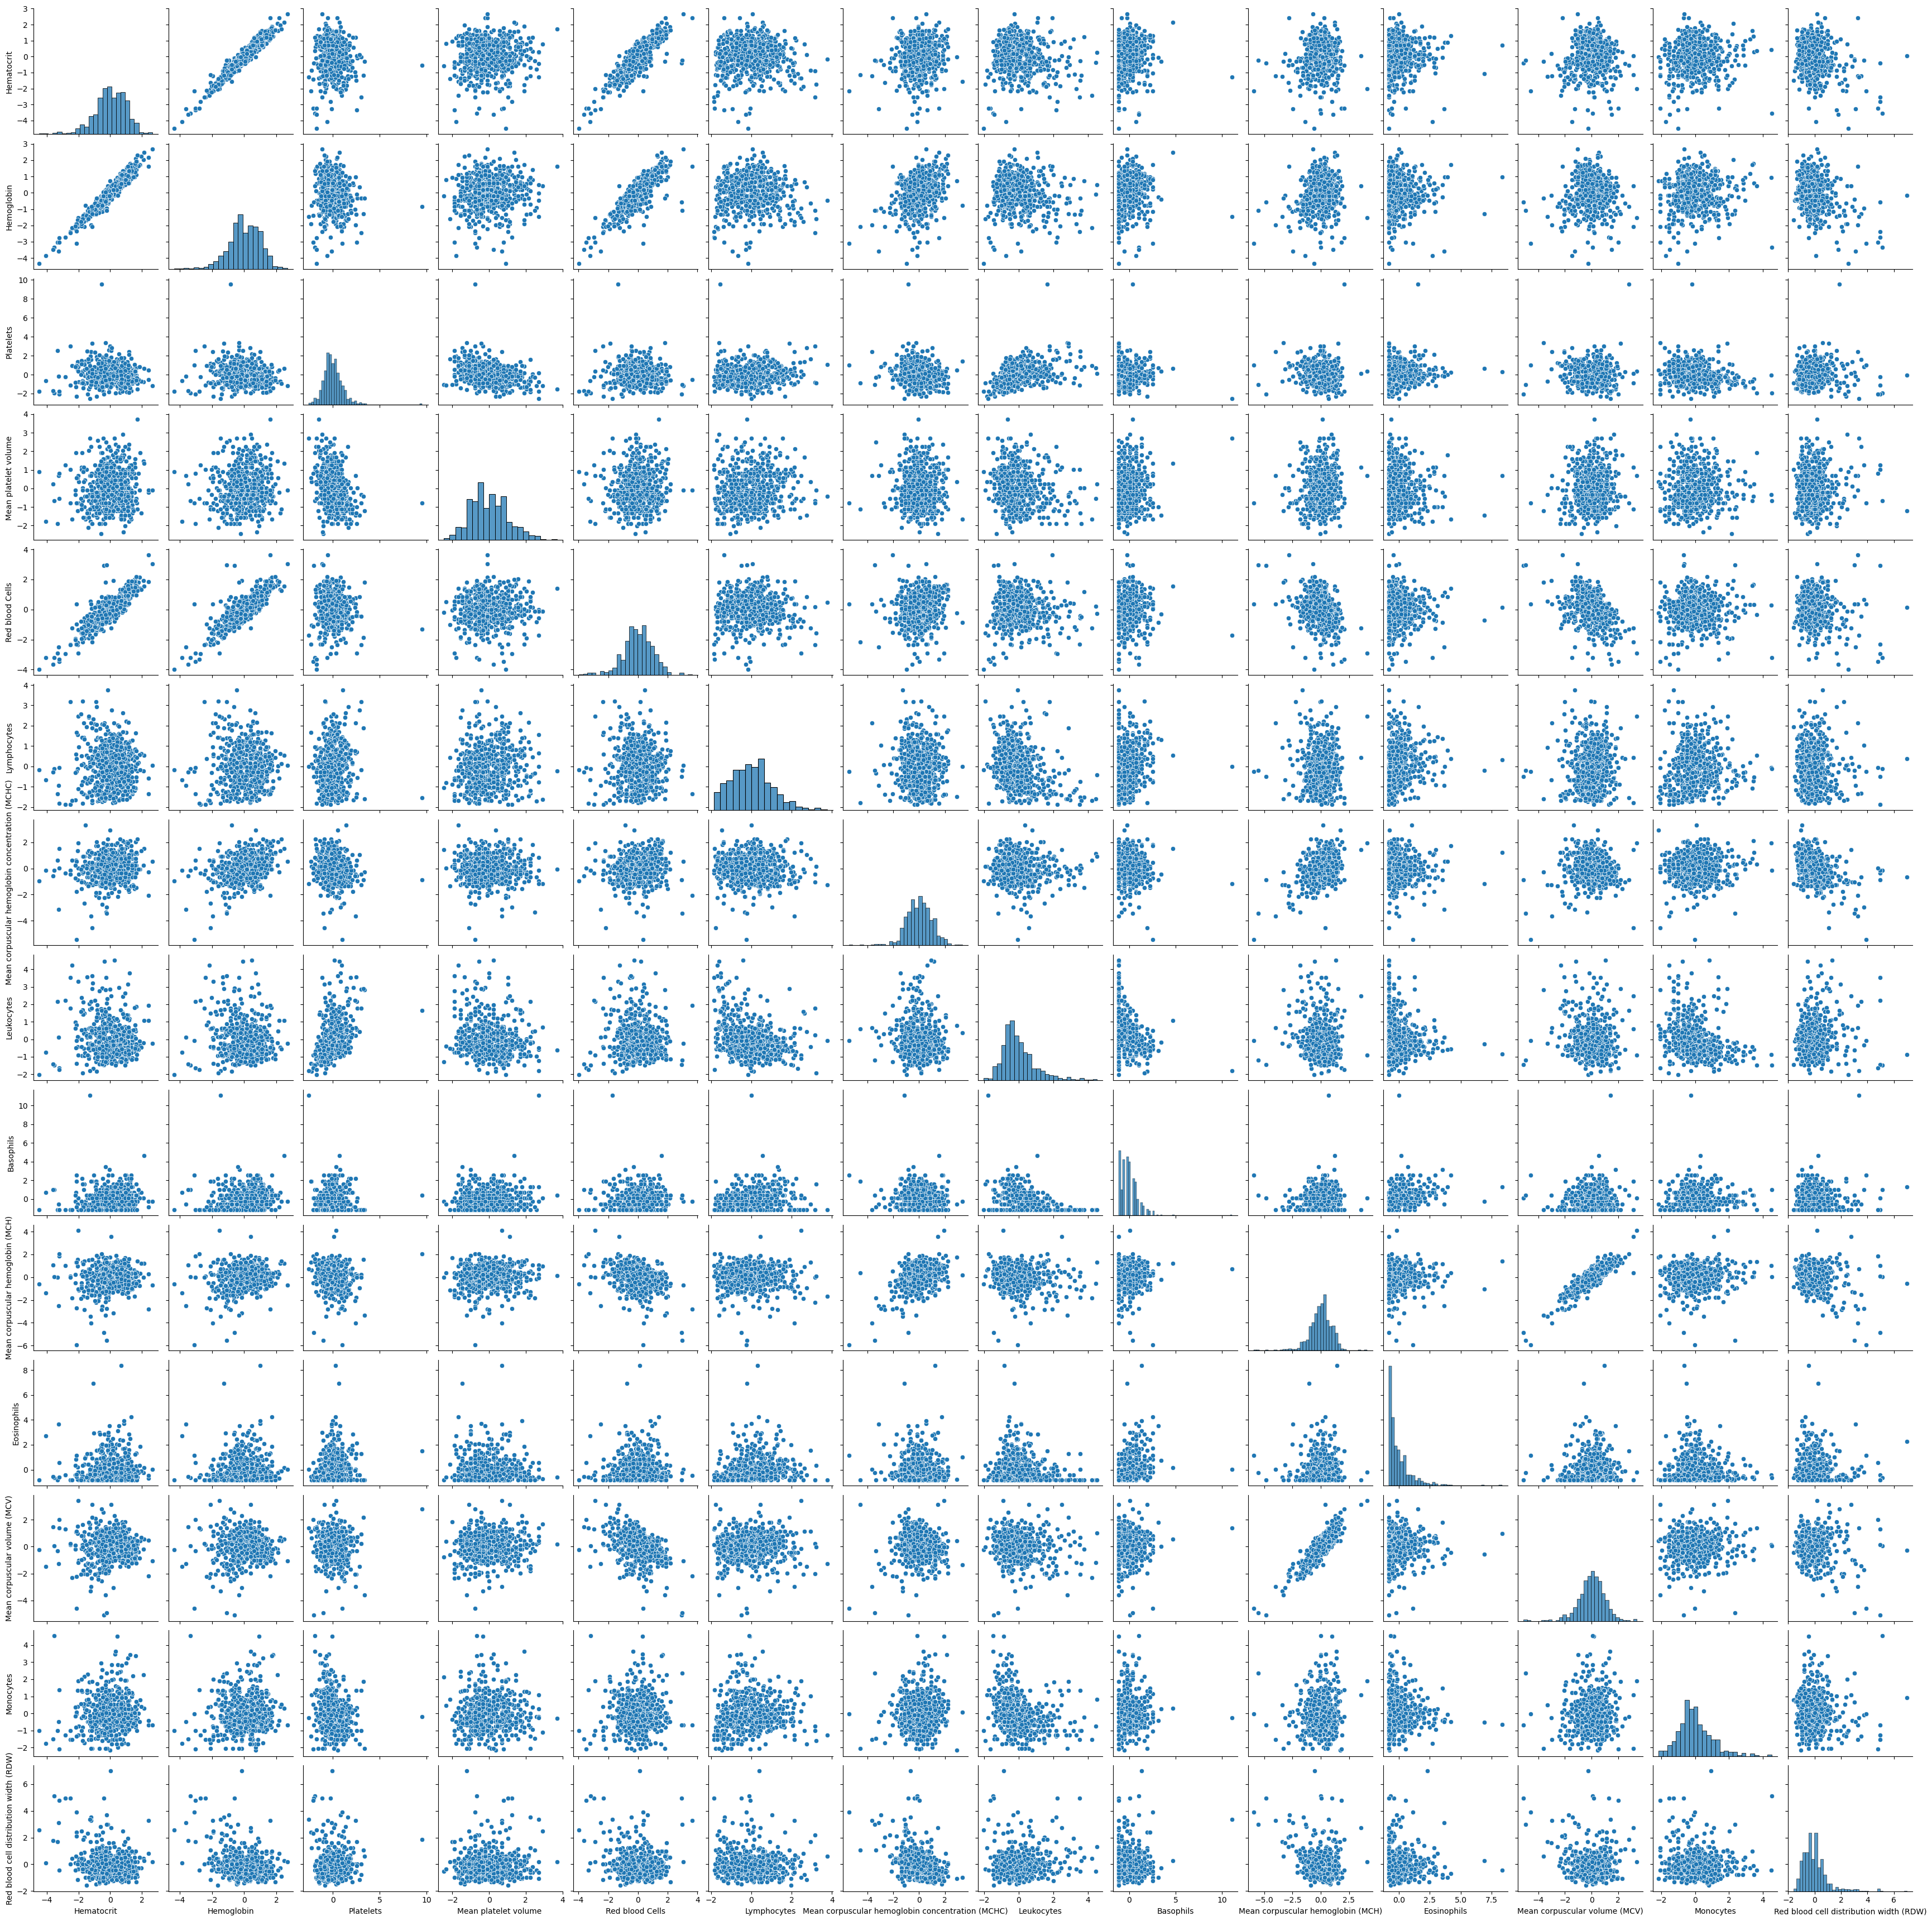

In [27]:
sns.pairplot(df[blood_columns])

<AxesSubplot:>

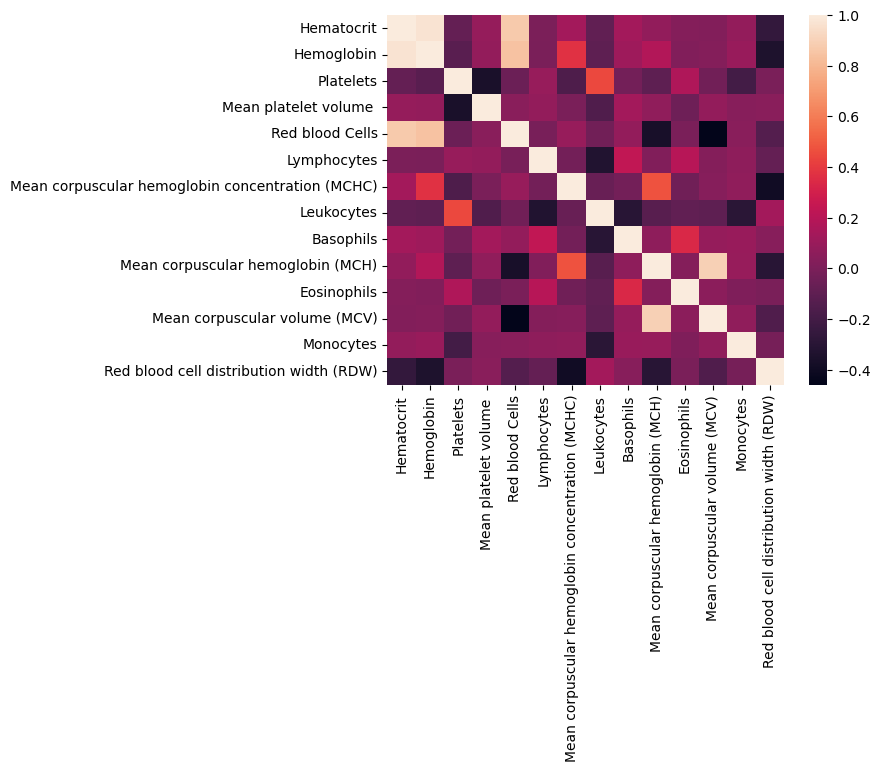

In [28]:
sns.heatmap(df[blood_columns].corr())

In [29]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [30]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

# Hospitalisation

## Objectif:
Notre objectif dans ce cas est de voir si nous devons supprimer ces trois variables ou non : 
-Patient addmited to regular ward (1=yes, 0=no)
-Patient addmited to semi-intensive unit
-Patient addmited to intensive care unit (1=yes, 0=no) 

## Conclusion

En faisant un displot on arrive à la conclusion de garder ces trois variables car on peut voir qu'elles sont significatives.

/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


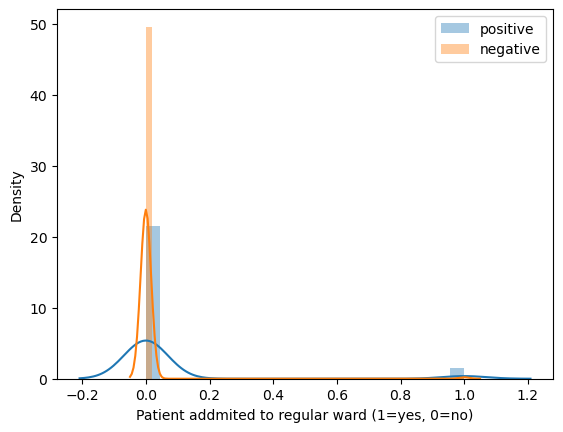

In [31]:
plt.figure()
sns.distplot(positive_df['Patient addmited to regular ward (1=yes, 0=no)'], label='positive')
sns.distplot(negative_df['Patient addmited to regular ward (1=yes, 0=no)'], label='negative')
plt.legend()

/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ibrahim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


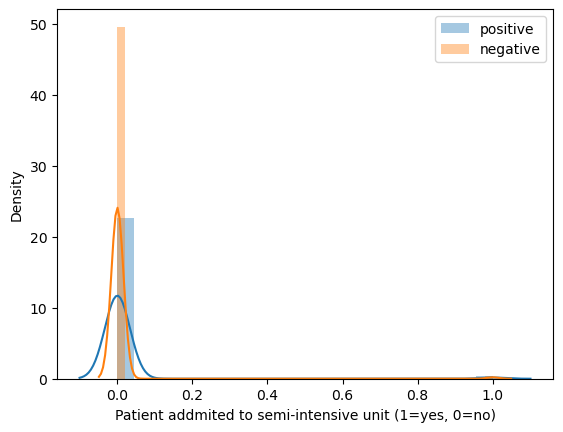

In [32]:
plt.figure()
sns.distplot(positive_df['Patient addmited to semi-intensive unit (1=yes, 0=no)'], label='positive')
sns.distplot(negative_df['Patient addmited to semi-intensive unit (1=yes, 0=no)'], label='negative')
plt.legend()

# Relation target / test viral

## Objectif:
Notre but est de voir si nos variables de type "test viral" sont significatifs

## Conclusion
En comparant notre target avec les variables de type "test viral" nous observons que nos variables n'ont aucun lien avec le covid-19 donc ils ne sont pas significatives mais attention nous avons jugé necessaire de verifier cette hypothèse dans la partie pre-processing.
On va appliquer un modèle en gardant ces variables et appliquer un modèle en les enlevant et par la suite comparer les scores pour voir si ce qu'on dit est vrai ou faux.

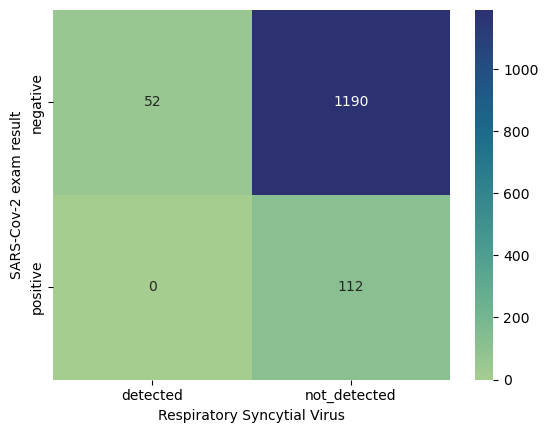

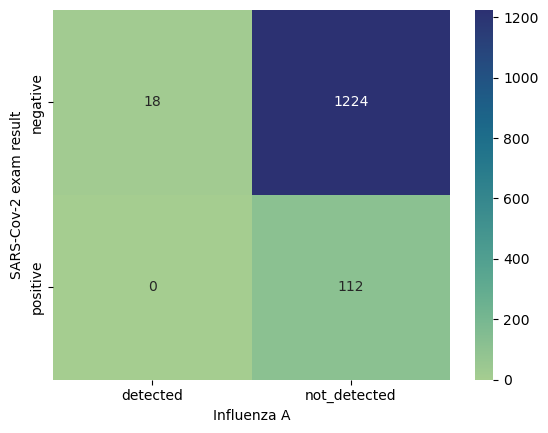

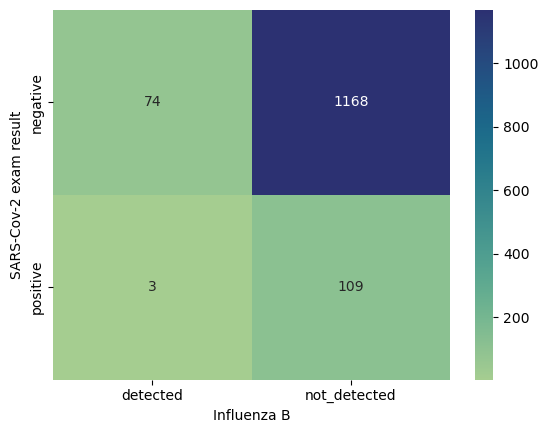

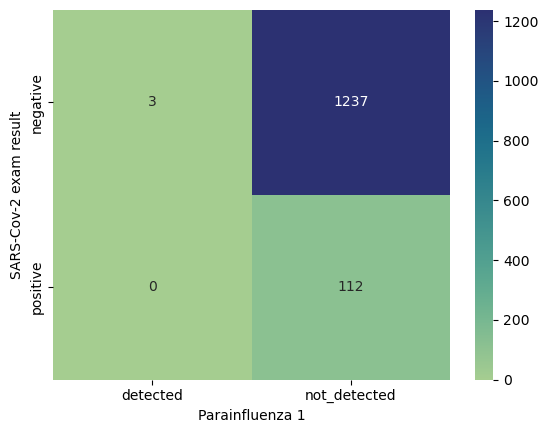

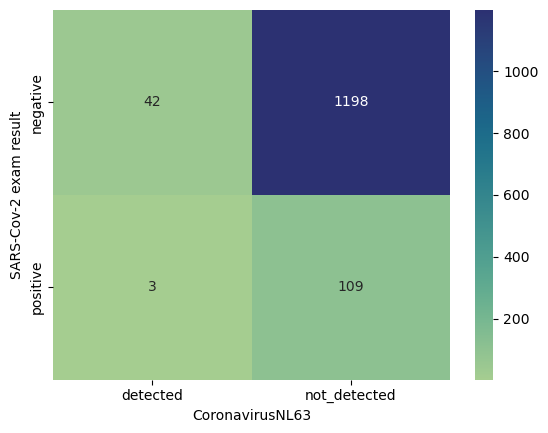

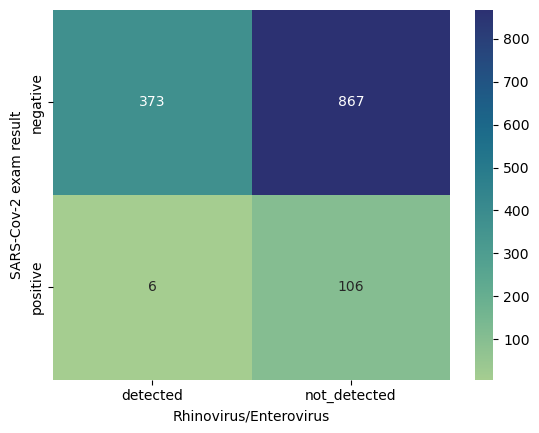

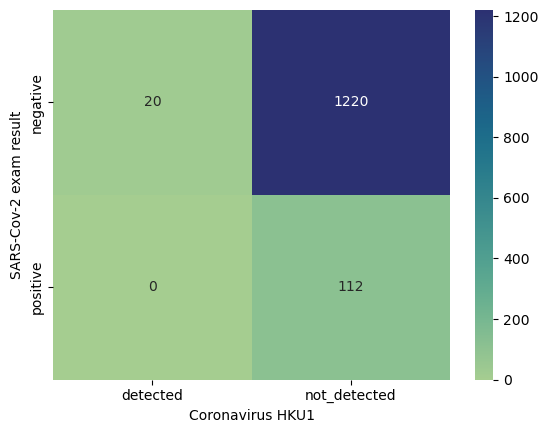

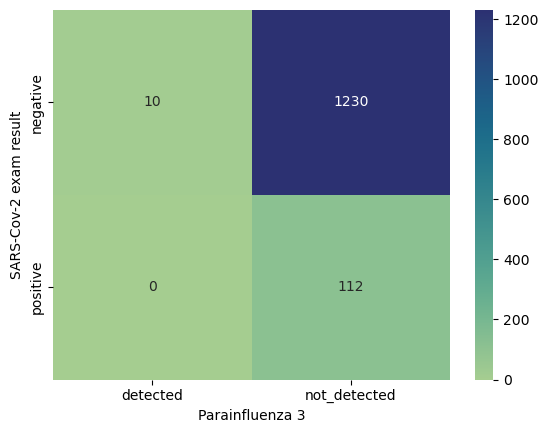

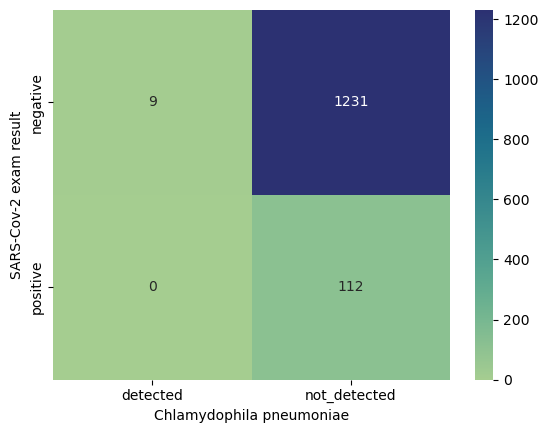

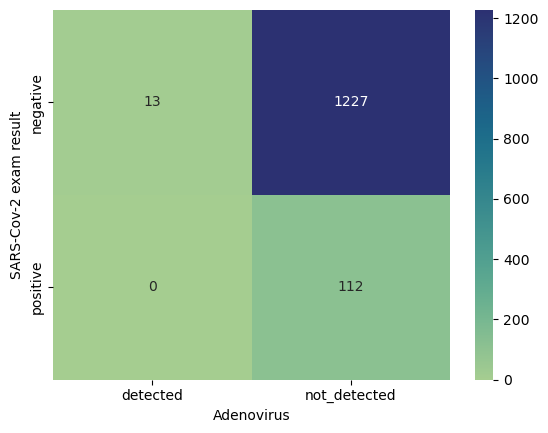

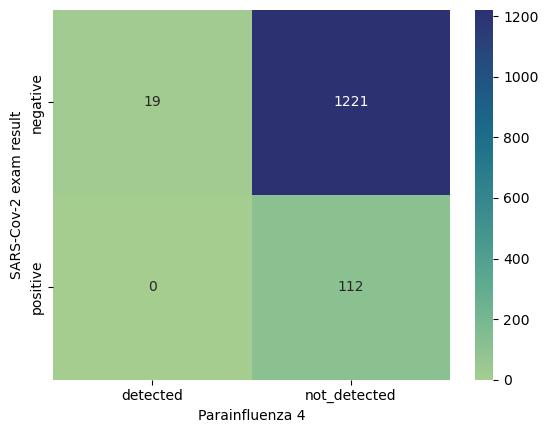

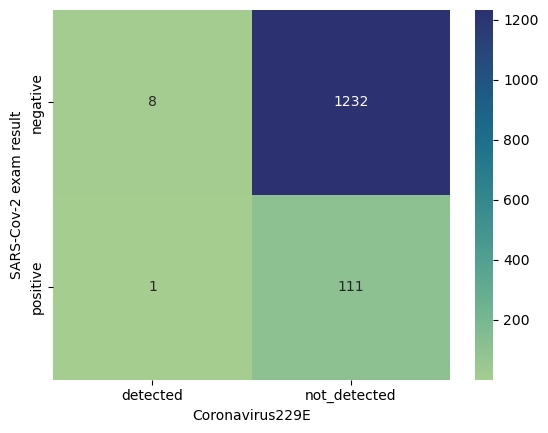

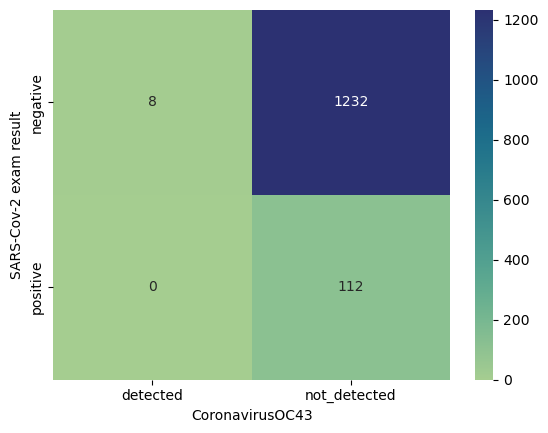

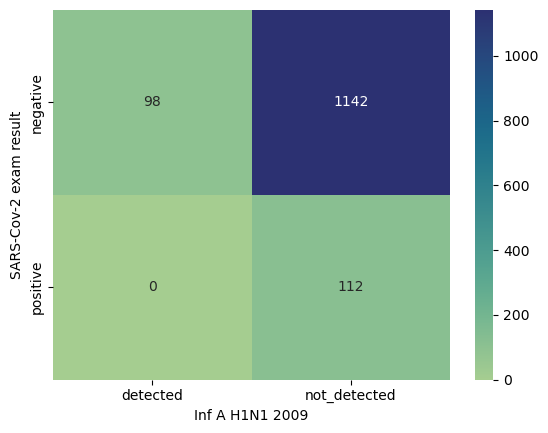

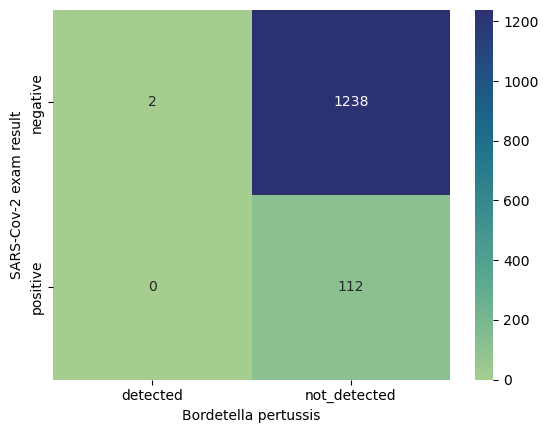

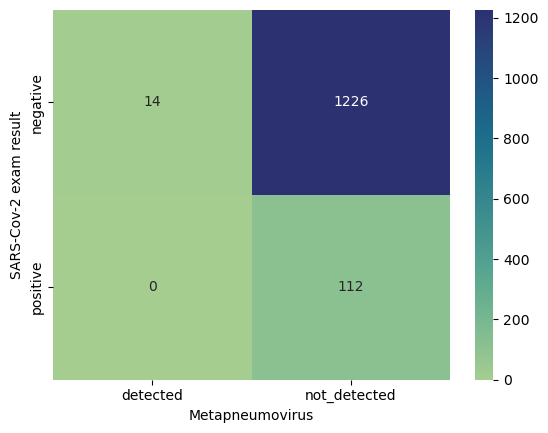

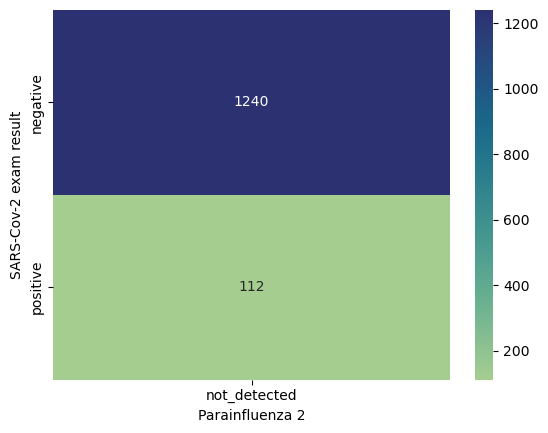

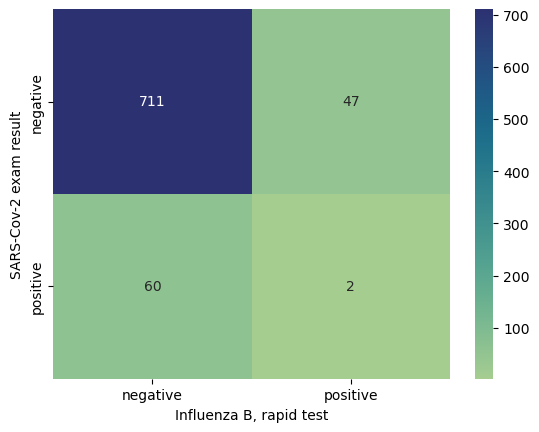

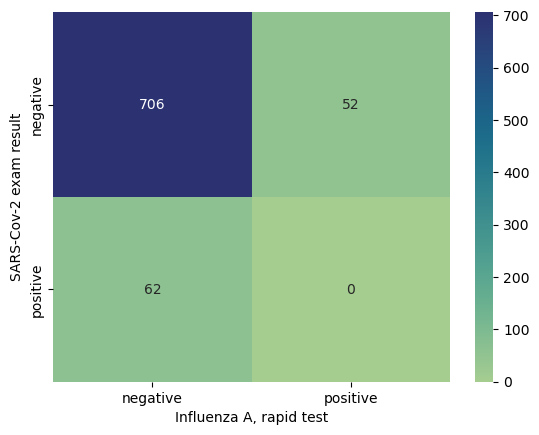

In [33]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,cmap='crest',fmt='d')

<AxesSubplot:xlabel='Influenza A', ylabel='SARS-Cov-2 exam result'>

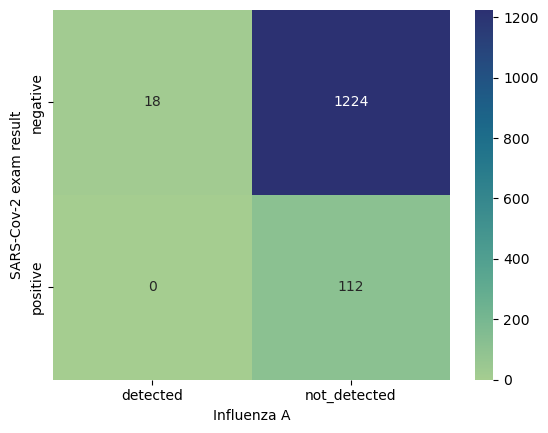

In [34]:
plt.figure()
sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A']),annot=True,cmap='crest',fmt='d')

# Analyse de la variable "Patient age quantile"

-Il est difficile pour nous d'interpreter pourquoi l'age dans notre cas est entre 0 et 19 alors qu'en general l'age est entre 1 et 100 ans et malheureusement la personne qui a posté ce dataset sur kaggle n'a laissé aucune information sur la variable "Patient age quantile" donc tout ce que nous pouvons faire c'est emettre des hypothèses.
En jettant un coup d'oeil dans la discussion sur kaggle on s'est aperçu que beaucoup de personnes ont été confronté à ce problème aussi donc l'hypothèse qu'ils ont emis c'est de voir ces chiffres comme des tranches d'age:
1 [0 5]
2 [6 10]
3 [11 15]
4 [16 20]
5 [21 25]
6 [26 30]
......

-Grace à notre fonction countplot nous avons pu dementir une information qui circulait en disant que les enfants ne peuvent pas etre atteint du covid-19
nous avons belle et bien vu qu'enfant comme adulte sont exposés à cette maladie.
l'age n'a aucune importance.

-En revanche en se basant sur notre hypothèse sur l'age nous observons que les individus de faible age sont tres peu contaminés.

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

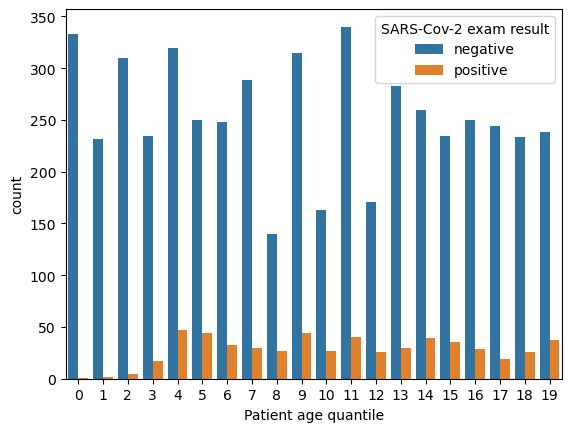

In [35]:
sns.countplot(data=df,x='Patient age quantile',hue='SARS-Cov-2 exam result')

# Test de student

Le test de student permet de verifier si la moyenne entre deux distributions est significativement differente.


## Comment faire le test

Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents

H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs

## Conclusion

Nous pouvons conclure que la decision que la decision qu'on avait prise tout en haut avec le graphique est bien fondé car le test vient de nous le prouver.

In [36]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [37]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [38]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- H0 Rejetée
Hemoglobin---------------------------------------- H0 Rejetée
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- H0 Rejetée
Red blood Cells----------------------------------- H0 Rejetée
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0


## Preprocessing  

In [229]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import shap
import xgboost

In [40]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

Suppression de tous mes variables virales comme convenu dans la partie EDA

In [41]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']
ds = df[key_columns + blood_columns]

In [42]:
df_imp = ds.copy()

In [43]:
def encode(df):
    code = {
             'positive' : 1,
             'negative' : 0
            
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col] = df[col].map(code)
    
    return df

In [44]:
# imputing median values on the missing values
neg = df_imp[df_imp['SARS-Cov-2 exam result']=='negative']
neg.fillna(neg.median(), inplace=True)
pos = df_imp[df_imp['SARS-Cov-2 exam result']=='positive']
pos.fillna(pos.median(), inplace= True)


Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [45]:
df_median = pd.concat([neg,pos])

In [46]:
df_median

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                       13               negative    0.019074   -0.022340   
1                       17               negative    0.236515   -0.022340   
2                        8               negative    0.019074   -0.022340   
3                        5               negative    0.019074   -0.022340   
4                       15               negative    0.019074   -0.022340   
...                    ...                    ...         ...         ...   
5632                    16               positive    0.350958    0.416252   
5633                     4               positive    0.350958    0.416252   
5634                    15               positive    0.350958    0.416252   
5639                     3               positive    0.350958    0.416252   
5643                    19               positive    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0      0.022745              -0.101517        -0.003778     0.002791   
1     -0.517413               0.010677         0.102004     0.318366   
2      0.022745              -0.101517        -0.003778     0.002791   
3      0.022745              -0.101517        -0.003778     0.002791   
4      0.022745              -0.101517        -0.003778     0.002791   
...         ...                    ...              ...          ...   
5632  -0.718402               0.235063         0.278308    -0.073970   
5633  -0.718402               0.235063         0.278308    -0.073970   
5634  -0.718402               0.235063         0.278308    -0.073970   
5639  -0.718402               0.235063         0.278308    -0.073970   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                            -0.054585   -0.080696  -0.223767   
1                                            -0.950790   -0.094610  -0.223767   
2                                            -0.054585   -0.080696  -0.223767   
3                                            -0.054585   -0.080696  -0.223767   
4                                            -0.054585   -0.080696  -0.223767   
...                                                ...         ...        ...   
5632                                          0.144572   -0.834833  -0.223767   
5633                                          0.144572   -0.834833  -0.223767   
5634                                          0.144572   -0.834833  -0.223767   
5639                                          0.144572   -0.834833  -0.223767   
5643                                         -0.353319   -1.288428  -1.140144   

      Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                              0.125903    -0.245556   
1                             -0.292269     1.482158   
2                              0.125903    -0.245556   
3                              0.125903    -0.245556   
4                              0.125903    -0.245556   
...                                 ...          ...   
5632                           0.125903    -0.666950   
5633                           0.125903    -0.666950   
5634                           0.125903    -0.666950   
5639                           0.125903    -0.666950   
5643                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
0                          0.086074  -0.220244   
1                          0.166192   0.357547   
2                          0.086074  -0.220244   
3                          0.086074  -0.220244   
4                          0.086074  -0.220244   
...                             ...        ...   
5632                      -0.054132   0.515126   
5633                      -0.054132   0.515126   
5634                      -0.054132   0.515126   
5639                      -0.054132   0.515126   
5643                

In [47]:
df_median.isna().sum().sort_values(ascending=False)

Patient age quantile                                0
SARS-Cov-2 exam result                              0
Hematocrit                                          0
Hemoglobin                                          0
Platelets                                           0
Mean platelet volume                                0
Red blood Cells                                     0
Lymphocytes                                         0
Mean corpuscular hemoglobin concentration (MCHC)    0
Leukocytes                                          0
Basophils                                           0
Mean corpuscular hemoglobin (MCH)                   0
Eosinophils                                         0
Mean corpuscular volume (MCV)                       0
Monocytes                                           0
Red blood cell distribution width (RDW)             0
dtype: int64

In [48]:
dp = df_median.copy()

In [49]:
encode(df_median)

Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                       13                       0    0.019074   -0.022340   
1                       17                       0    0.236515   -0.022340   
2                        8                       0    0.019074   -0.022340   
3                        5                       0    0.019074   -0.022340   
4                       15                       0    0.019074   -0.022340   
...                    ...                     ...         ...         ...   
5632                    16                       1    0.350958    0.416252   
5633                     4                       1    0.350958    0.416252   
5634                    15                       1    0.350958    0.416252   
5639                     3                       1    0.350958    0.416252   
5643                    19                       1    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0      0.022745              -0.101517        -0.003778     0.002791   
1     -0.517413               0.010677         0.102004     0.318366   
2      0.022745              -0.101517        -0.003778     0.002791   
3      0.022745              -0.101517        -0.003778     0.002791   
4      0.022745              -0.101517        -0.003778     0.002791   
...         ...                    ...              ...          ...   
5632  -0.718402               0.235063         0.278308    -0.073970   
5633  -0.718402               0.235063         0.278308    -0.073970   
5634  -0.718402               0.235063         0.278308    -0.073970   
5639  -0.718402               0.235063         0.278308    -0.073970   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                            -0.054585   -0.080696  -0.223767   
1                                            -0.950790   -0.094610  -0.223767   
2                                            -0.054585   -0.080696  -0.223767   
3                                            -0.054585   -0.080696  -0.223767   
4                                            -0.054585   -0.080696  -0.223767   
...                                                ...         ...        ...   
5632                                          0.144572   -0.834833  -0.223767   
5633                                          0.144572   -0.834833  -0.223767   
5634                                          0.144572   -0.834833  -0.223767   
5639                                          0.144572   -0.834833  -0.223767   
5643                                         -0.353319   -1.288428  -1.140144   

      Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                              0.125903    -0.245556   
1                             -0.292269     1.482158   
2                              0.125903    -0.245556   
3                              0.125903    -0.245556   
4                              0.125903    -0.245556   
...                                 ...          ...   
5632                           0.125903    -0.666950   
5633                           0.125903    -0.666950   
5634                           0.125903    -0.666950   
5639                           0.125903    -0.666950   
5643                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
0                          0.086074  -0.220244   
1                          0.166192   0.357547   
2                          0.086074  -0.220244   
3                          0.086074  -0.220244   
4                          0.086074  -0.220244   
...                             ...        ...   
5632                      -0.054132   0.515126   
5633                      -0.054132   0.515126   
5634                      -0.054132   0.515126   
5639                      -0.054132   0.515126   
5643    

# Modelisation et entrainement

In [50]:
df_median['SARS-Cov-2 exam result'].value_counts()

0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64

In [51]:
X = dp.drop('SARS-Cov-2 exam result', axis=1)
y = df_median['SARS-Cov-2 exam result']

Vu que nous avons un desequilibre de classe nous avons decidé une technique de réequilibre qui est le SMOTE.
SMOTE est une technique de suréchantillonnage qui génère des échantillons synthétiques à partir de la classe minoritaire . Il est utilisé pour obtenir un ensemble d'apprentissage synthétiquement équilibré en classe ou presque équilibré en classe, qui est ensuite utilisé pour former le classifieur

In [221]:
X, y = SMOTE().fit_resample(X, y)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


## AdaBoost

In [230]:
model_1 = make_pipeline(StandardScaler(),AdaBoostClassifier())
model_1.fit(X_train,y_train)
pred = model_1.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1039
           1       0.98      0.99      0.98       996

    accuracy                           0.98      2035
   macro avg       0.98      0.98      0.98      2035
weighted avg       0.98      0.98      0.98      2035



In [169]:
model_1.score(X_test,y_test)

0.9809960681520314

In [55]:
model_1 = make_pipeline(MinMaxScaler(),AdaBoostClassifier())
model_1.fit(X_train,y_train)
pred = model_1.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1551
           1       0.98      0.98      0.98      1501

    accuracy                           0.98      3052
   macro avg       0.98      0.98      0.98      3052
weighted avg       0.98      0.98      0.98      3052



In [56]:
model_1 = make_pipeline(RobustScaler(),AdaBoostClassifier())
model_1.fit(X_train,y_train)
pred = model_1.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1551
           1       0.98      0.98      0.98      1501

    accuracy                           0.98      3052
   macro avg       0.98      0.98      0.98      3052
weighted avg       0.98      0.98      0.98      3052



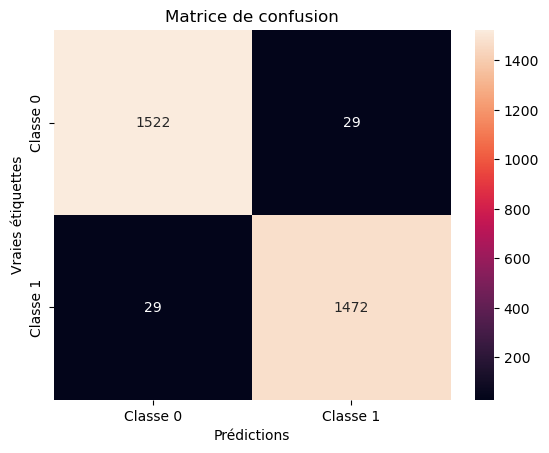

In [189]:
cm = confusion_matrix(y_test, pred)

class_labels = ['Classe 0', 'Classe 1']

sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')

plt.show()

## Detection de l'Overfitting 

Dans ce cas, les scores de validation croisée sont élevés et relativement similaires pour chaque fold, ce qui suggère une bonne performance du modèle sur les sous-ensembles d'entraînement et de validation. Le score moyen de validation croisée est également élevé (environ 0.984), indiquant une performance globalement solide du modèle.

Les métriques d'évaluation sur l'ensemble de validation montrent également de bons résultats. L'accuracy (exactitude) est élevée (environ 0.985), ce qui signifie que le modèle prédit correctement la classe de la plupart des échantillons. La precision (précision) est également élevée (environ 0.980), ce qui indique un faible taux de faux positifs. Le recall (rappel) est élevé (environ 0.990), ce qui suggère un faible taux de faux négatifs. Le F1-score est également élevé (environ 0.985), ce qui représente une bonne harmonie entre la précision et le rappel.

Le score sur l'ensemble de test est également élevé (environ 0.984), ce qui confirme la performance générale du modèle.

Dans l'ensemble, ces résultats indiquent que le modèle a une bonne capacité à généraliser et à prédire avec précision sur de nouvelles données. Donc notre modèle n'est pas en overfitting

In [231]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


model = AdaBoostClassifier()


cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculer la moyenne des scores de validation croisée
mean_score = cross_val_scores.mean()

# Afficher les scores de validation croisée pour chaque fold
print("Scores de validation croisée :")
for i, score in enumerate(cross_val_scores):
    print(f"Fold {i+1}: {score}")

# Afficher le score moyen
print("Score moyen : ", mean_score)

# Entraîner le modèle sur l'ensemble d'entraînement complet
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
val_predictions = model.predict(X_val)

# Calcul des métriques d'évaluation sur l'ensemble de validation
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

# Afficher les métriques d'évaluation sur l'ensemble de validation
print("Métriques d'évaluation sur l'ensemble de validation:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Évaluer la performance du modèle sur l'ensemble de test
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Afficher le score sur l'ensemble de test
print("Score sur l'ensemble de test :", test_accuracy)

Scores de validation croisée :
Fold 1: 0.984029484029484
Fold 2: 0.984029484029484
Fold 3: 0.9852489244007375
Fold 4: 0.9803318992009834
Fold 5: 0.986478180700676
Score moyen :  0.984023594472273
Métriques d'évaluation sur l'ensemble de validation:
Accuracy: 0.9852507374631269
Precision: 0.9801587301587301
Recall: 0.9899799599198397
F1-score: 0.9850448654037885
Score sur l'ensemble de test : 0.9842829076620825


## Visualisation des features_importances 

<AxesSubplot:>

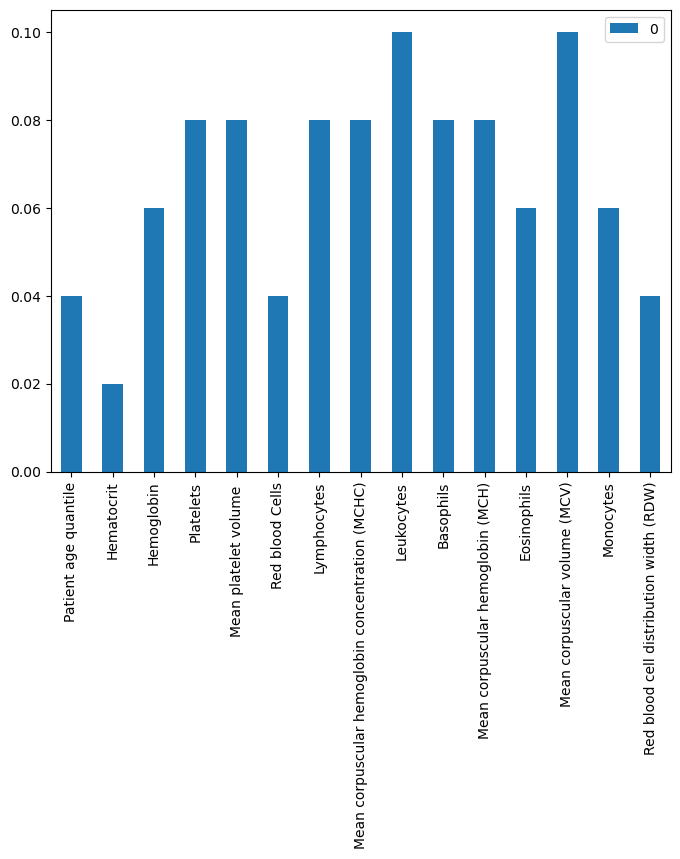

In [57]:
feature_importances = model_1.named_steps['adaboostclassifier'].feature_importances_
pd.DataFrame(feature_importances, index=X_train.columns).plot.bar(figsize=(8,6))

## Random Forest 

In [182]:
model_2 = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=0))
model_2.fit(X_train,y_train)
pred = model_2.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1551
           1       0.99      1.00      0.99      1501

    accuracy                           0.99      3052
   macro avg       0.99      0.99      0.99      3052
weighted avg       0.99      0.99      0.99      3052



In [171]:
model_2.score(X_test,y_test)

0.9931192660550459

In [59]:
model_2 = make_pipeline(MinMaxScaler(),RandomForestClassifier(random_state=0))
model_2.fit(X_train,y_train)
pred = model_2.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1551
           1       0.99      1.00      0.99      1501

    accuracy                           0.99      3052
   macro avg       0.99      0.99      0.99      3052
weighted avg       0.99      0.99      0.99      3052



In [60]:
model_2 = make_pipeline(RobustScaler(),RandomForestClassifier(random_state=0))
model_2.fit(X_train,y_train)
pred = model_2.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1551
           1       0.99      1.00      0.99      1501

    accuracy                           0.99      3052
   macro avg       0.99      0.99      0.99      3052
weighted avg       0.99      0.99      0.99      3052



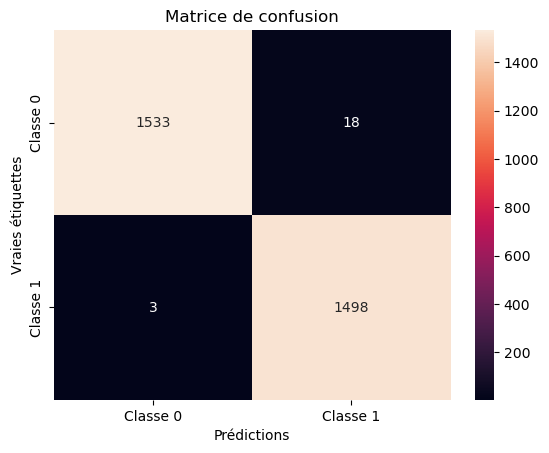

In [183]:
cm = confusion_matrix(y_test, pred)

class_labels = ['Classe 0', 'Classe 1']

sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')

plt.show()

## Detection d'Overfitting 

Les scores de validation croisée et les métriques d'évaluation sur l'ensemble de validation et de testindiquent des performances élevées et une absence apparente d'overfitting. 
-Scores de validation croisée : Les scores de validation croisée sont tous élevés, variant entre 0.989 et 0.995. Cela suggère que le modèle généralise bien les données et n'est pas trop ajusté aux données d'entraînement spécifiques.

In [248]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


model = RandomForestClassifier(random_state=0)


cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculer la moyenne des scores de validation croisée
mean_score = cross_val_scores.mean()

# Afficher les scores de validation croisée pour chaque fold
print("Scores de validation croisée :")
for i, score in enumerate(cross_val_scores):
    print(f"Fold {i+1}: {score}")

# Afficher le score moyen
print("Score moyen : ", mean_score)

# Entraîner le modèle sur l'ensemble d'entraînement complet
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
val_predictions = model.predict(X_val)

# Calcul des métriques d'évaluation sur l'ensemble de validation
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

# Afficher les métriques d'évaluation sur l'ensemble de validation
print("Métriques d'évaluation sur l'ensemble de validation:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Évaluer la performance du modèle sur l'ensemble de test
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Afficher le score sur l'ensemble de test
print("Score sur l'ensemble de test :", test_accuracy)

Scores de validation croisée :
Fold 1: 0.9895577395577395
Fold 2: 0.9957002457002457
Fold 3: 0.9938537185003073
Fold 4: 0.9944683466502766
Fold 5: 0.9950829748002459
Score moyen :  0.993732605041763
Métriques d'évaluation sur l'ensemble de validation:
Accuracy: 0.9960668633235005
Precision: 0.9940119760479041
Recall: 0.9979959919839679
F1-score: 0.996
Score sur l'ensemble de test : 0.9980353634577603


## Visualisation des feature_importance  

<AxesSubplot:>

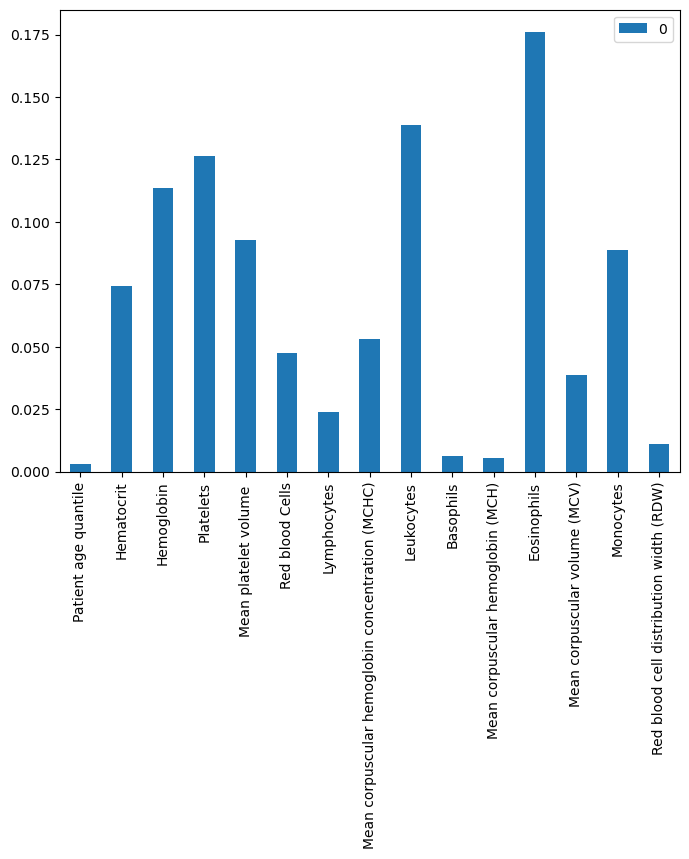

In [61]:
feature_importances = model_2.named_steps['randomforestclassifier'].feature_importances_
pd.DataFrame(feature_importances, index=X_train.columns).plot.bar(figsize=(8,6))

## XGBoost 

In [62]:
model_3 = make_pipeline(RobustScaler(),xgboost.XGBClassifier(n_estimators=200, max_depth=4))
model_3.fit(X_train,y_train)
pred = model_3.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1551
           1       0.99      1.00      0.99      1501

    accuracy                           0.99      3052
   macro avg       0.99      0.99      0.99      3052
weighted avg       0.99      0.99      0.99      3052



In [63]:
model_3 = make_pipeline(MinMaxScaler(),xgboost.XGBClassifier(n_estimators=200, max_depth=4))
model_3.fit(X_train,y_train)
pred = model_3.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1551
           1       0.99      1.00      0.99      1501

    accuracy                           0.99      3052
   macro avg       0.99      0.99      0.99      3052
weighted avg       0.99      0.99      0.99      3052



In [233]:
model_3 = make_pipeline(StandardScaler(),xgboost.XGBClassifier(n_estimators=200, max_depth=4))
model_3.fit(X_train,y_train)
pred = model_3.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       521
           1       0.99      0.99      0.99       497

    accuracy                           0.99      1018
   macro avg       0.99      0.99      0.99      1018
weighted avg       0.99      0.99      0.99      1018



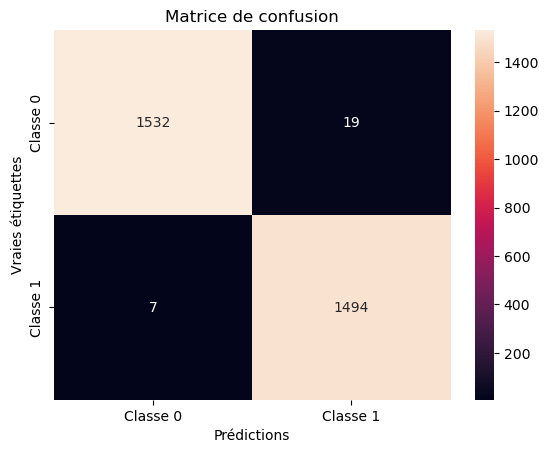

In [181]:
cm = confusion_matrix(y_test, pred)

class_labels = ['Classe 0', 'Classe 1']

sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')

plt.show()

## Detection d'Overfitting 

Ces résultats suggèrent que le modèle XGBoost généralise bien les données et n'est pas en l'overfitting

In [249]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


model = xgboost.XGBClassifier(n_estimators=200, max_depth=4)


cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculer la moyenne des scores de validation croisée
mean_score = cross_val_scores.mean()

# Afficher les scores de validation croisée pour chaque fold
print("Scores de validation croisée :")
for i, score in enumerate(cross_val_scores):
    print(f"Fold {i+1}: {score}")

# Afficher le score moyen
print("Score moyen : ", mean_score)

# Entraîner le modèle sur l'ensemble d'entraînement complet
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
val_predictions = model.predict(X_val)

# Calcul des métriques d'évaluation sur l'ensemble de validation
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)

# Afficher les métriques d'évaluation sur l'ensemble de validation
print("Métriques d'évaluation sur l'ensemble de validation:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

# Évaluer la performance du modèle sur l'ensemble de test
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Afficher le score sur l'ensemble de test
print("Score sur l'ensemble de test :", test_accuracy)

Scores de validation croisée :
Fold 1: 0.9907862407862408
Fold 2: 0.9957002457002457
Fold 3: 0.9913952059004303
Fold 4: 0.9920098340503996
Fold 5: 0.9932390903503381
Score moyen :  0.9926261233575309
Métriques d'évaluation sur l'ensemble de validation:
Accuracy: 0.992133726647001
Precision: 0.9900199600798403
Recall: 0.9939879759519038
F1-score: 0.9919999999999999
Score sur l'ensemble de test : 0.9921414538310412


## Visualisation des features_importances 

<AxesSubplot:>

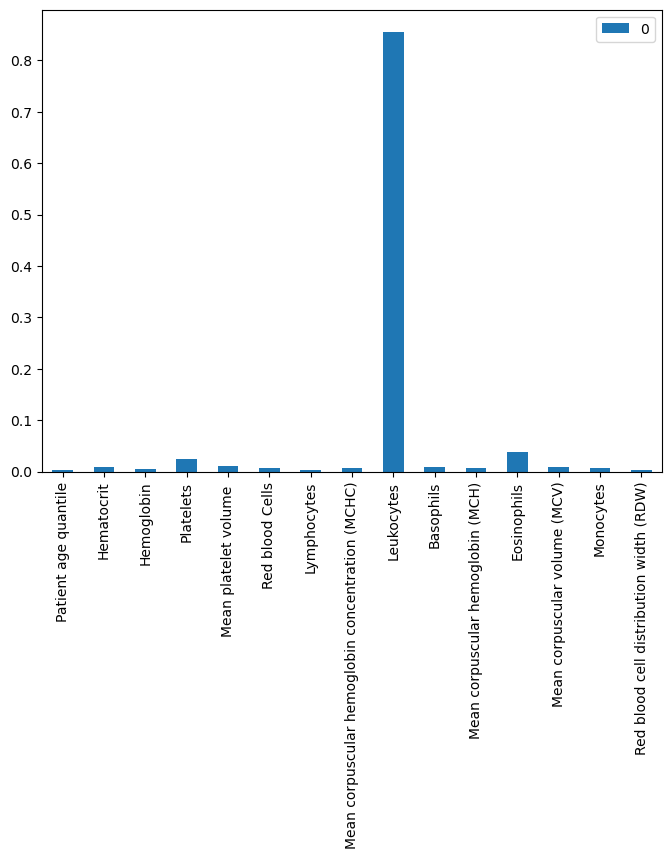

In [65]:
feature_importances = model_3.named_steps['xgbclassifier'].feature_importances_
pd.DataFrame(feature_importances, index=X_train.columns).plot.bar(figsize=(8,6))

## SVM 

In [196]:
model_4 = make_pipeline(StandardScaler(),SVC(kernel='poly'))
model_4.fit(X_train,y_train)
pred = model_4.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1551
           1       0.98      1.00      0.99      1501

    accuracy                           0.99      3052
   macro avg       0.99      0.99      0.99      3052
weighted avg       0.99      0.99      0.99      3052



In [192]:
model_4 = make_pipeline(RobustScaler(),SVC(kernel='poly'))
model_4.fit(X_train,y_train)
pred = model_4.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1551
           1       0.98      0.99      0.98      1501

    accuracy                           0.98      3052
   macro avg       0.98      0.98      0.98      3052
weighted avg       0.98      0.98      0.98      3052



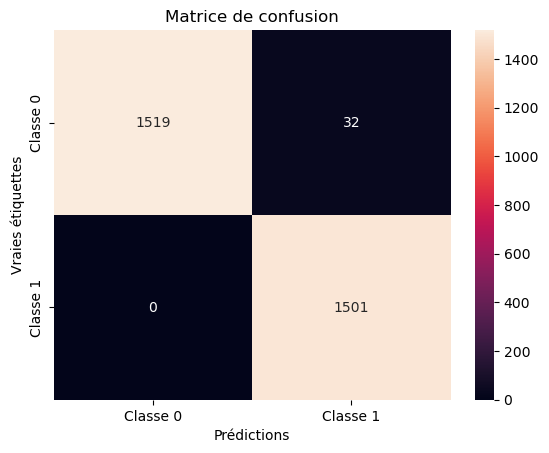

In [197]:
cm = confusion_matrix(y_test, pred)

class_labels = ['Classe 0', 'Classe 1']

sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)

plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')

plt.show()

## Model Selection 

## AdaBoost 

## Hyperparameter Optimisation en utilisant GridSearch CV

In [164]:
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

In [163]:
parameters = {
              'n_estimators':np.arange(1150,1250,25),
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]}

In [165]:
grid = GridSearchCV(estimator = AdaBoostClassifier(),  
                           param_grid = parameters,
                           cv = 5,
                           verbose=0)
grid.fit(X_train,y_train)

print('GridSearch CV meilleur score : {:.4f}\n\n'.format(grid.best_score_))


# print les paramètres qui donnent les meilleurs résultats
print('Les parameters qui donnent les meilleurs resultats :','\n\n', (grid.best_params_))


GridSearch CV meilleur score : 0.9878


Les parameters qui donnent les meilleurs resultats : 

 {'learning_rate': 0.1, 'n_estimators': 1150}


In [166]:
model1_1 = grid_search_cv.best_estimator_

In [167]:
model1_1.score(X_test,y_test)

0.991480996068152

In [128]:
print(classification_report(y_test,model1_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1551
           1       0.99      0.99      0.99      1501

    accuracy                           0.99      3052
   macro avg       0.99      0.99      0.99      3052
weighted avg       0.99      0.99      0.99      3052



## RandomForest 

## Hyperparameter Optimisation en utilisant GridSearch CV 

In [236]:
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

In [174]:
parameters = { 
    'n_estimators': [200,250,300,350,400, 500],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [175]:
grid = GridSearchCV(estimator = RandomForestClassifier(),  
                           param_grid = parameters,
                           cv = 5,
                           verbose=0)
grid.fit(X_train,y_train)

print('GridSearch CV meilleur score : {:.4f}\n\n'.format(grid.best_score_))


# print les paramètres qui donnent les meilleurs résultats
print('Les parameters qui donnent les meilleurs resultats :','\n\n', (grid.best_params_))

GridSearch CV meilleur score : 0.9934


Les parameters qui donnent les meilleurs resultats : 

 {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 400}


In [178]:
model2_2 = grid.best_estimator_

In [179]:
model2_2.score(X_test,y_test)

0.9918086500655308

## XGBoost 

## Hyperparameter Optimisation en utilisant GridSearch CV 

In [198]:
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

In [136]:
parameters = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

In [137]:
xgb = xgboost.XGBClassifier()

In [138]:
grid = GridSearchCV(estimator = xgb,  
                           param_grid = parameters,
                           cv = 5,
                           verbose=0)
grid.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

In [139]:

print('GridSearch CV meilleur score : {:.4f}\n\n'.format(grid.best_score_))


# print les paramètres qui donnent les meilleurs résultats
print('Les parameters qui donnent les meilleurs resultats :','\n\n', (grid.best_params_))

GridSearch CV meilleur score : 0.9933


Les parameters qui donnent les meilleurs resultats : 

 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [176]:
model3_1 = grid.best_estimator_

In [177]:
model3_1.score(X_test,y_test)

0.9918086500655308

## SVM

## Hyperparameter Optimisation en utilisant GridSearch CV

In [ ]:
scaler2 = StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

In [73]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
parameters = [ {'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']} 
              ]






In [ ]:
grid = GridSearchCV(estimator = SVC(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid.fit(X_train,y_train)


# print les paramètres qui donnent les meilleurs résultats
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print Estimateur choisi par la recherche
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

In [ ]:
model4_1 = grid.best_estimator_

In [ ]:
model4_1.score(X_test,y_test)

## Analyse des performances 

In [205]:
ada_probs = model1_1.predict_proba(X_test)
rf_probs = model2_2.predict_proba(X_test)
xgb_probs = model3_1.predict_proba(X_test)
#svm_probs = model_4.predict_proba(X_test)

In [206]:
ada_probs = ada_probs[:, 1]
rf_probs = rf_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
#svm_probs = svm_probs[:, 1]

In [207]:
from sklearn.metrics import roc_curve, roc_auc_score

In [211]:
rf_auc = roc_auc_score(y_test, rf_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
#svm_auc = roc_auc_score(y_test, svm_probs)

## Calcule de AUROC

In [213]:
rf_auc = roc_auc_score(y_test, rf_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
#svm_auc = roc_auc_score(Y_test, svm_probs)

## Calcule ROC curve

In [214]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

## Plot the ROC curve

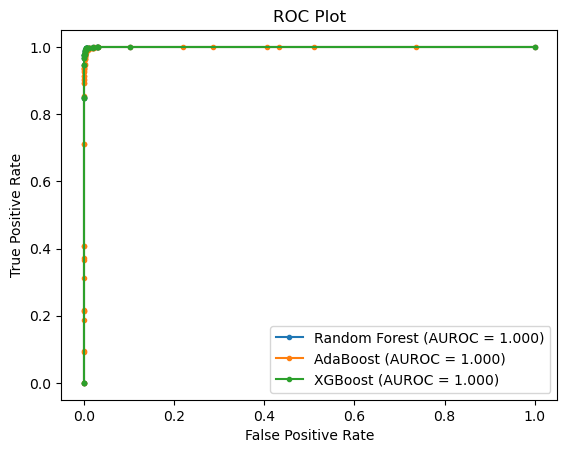

In [216]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % ada_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (AUROC = %0.3f)' % xgb_auc)
#plt.plot(svm_fpr, nb_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

L'AUC est une mesure de performance utilisée pour évaluer la qualité d'un modèle de classification binaire en se basant sur la courbe ROC. L'AUC représente la probabilité que le modèle classe correctement une instance positive au hasard plus haut que l'instance négative au hasard.

# Resultat et conclusion 

Un AUC de 1 signifie que le modèle est capable de classer parfaitement toutes les instances positives devant toutes les instances négatives, sans aucune erreur de classification. C'est le résultat idéal et indique une performance exceptionnelle du modèle.

Vu que notre modèle est capable de classer parfaitement toutes instances positives devant les instances negatives nous allons choisir le modèle qui donne le bon score 